In [1]:
import numpy as np
import matplotlib.pyplot as plt
import _LIB_Ito_Diffusion as Ito
plt.style.use('dark_background')

In [2]:
T = 1
SCHEME_STEPS = int(1e4)
LEGEND_SIZE = 32
FONT_SIZE = 32

## Brownian motion, with and without drift

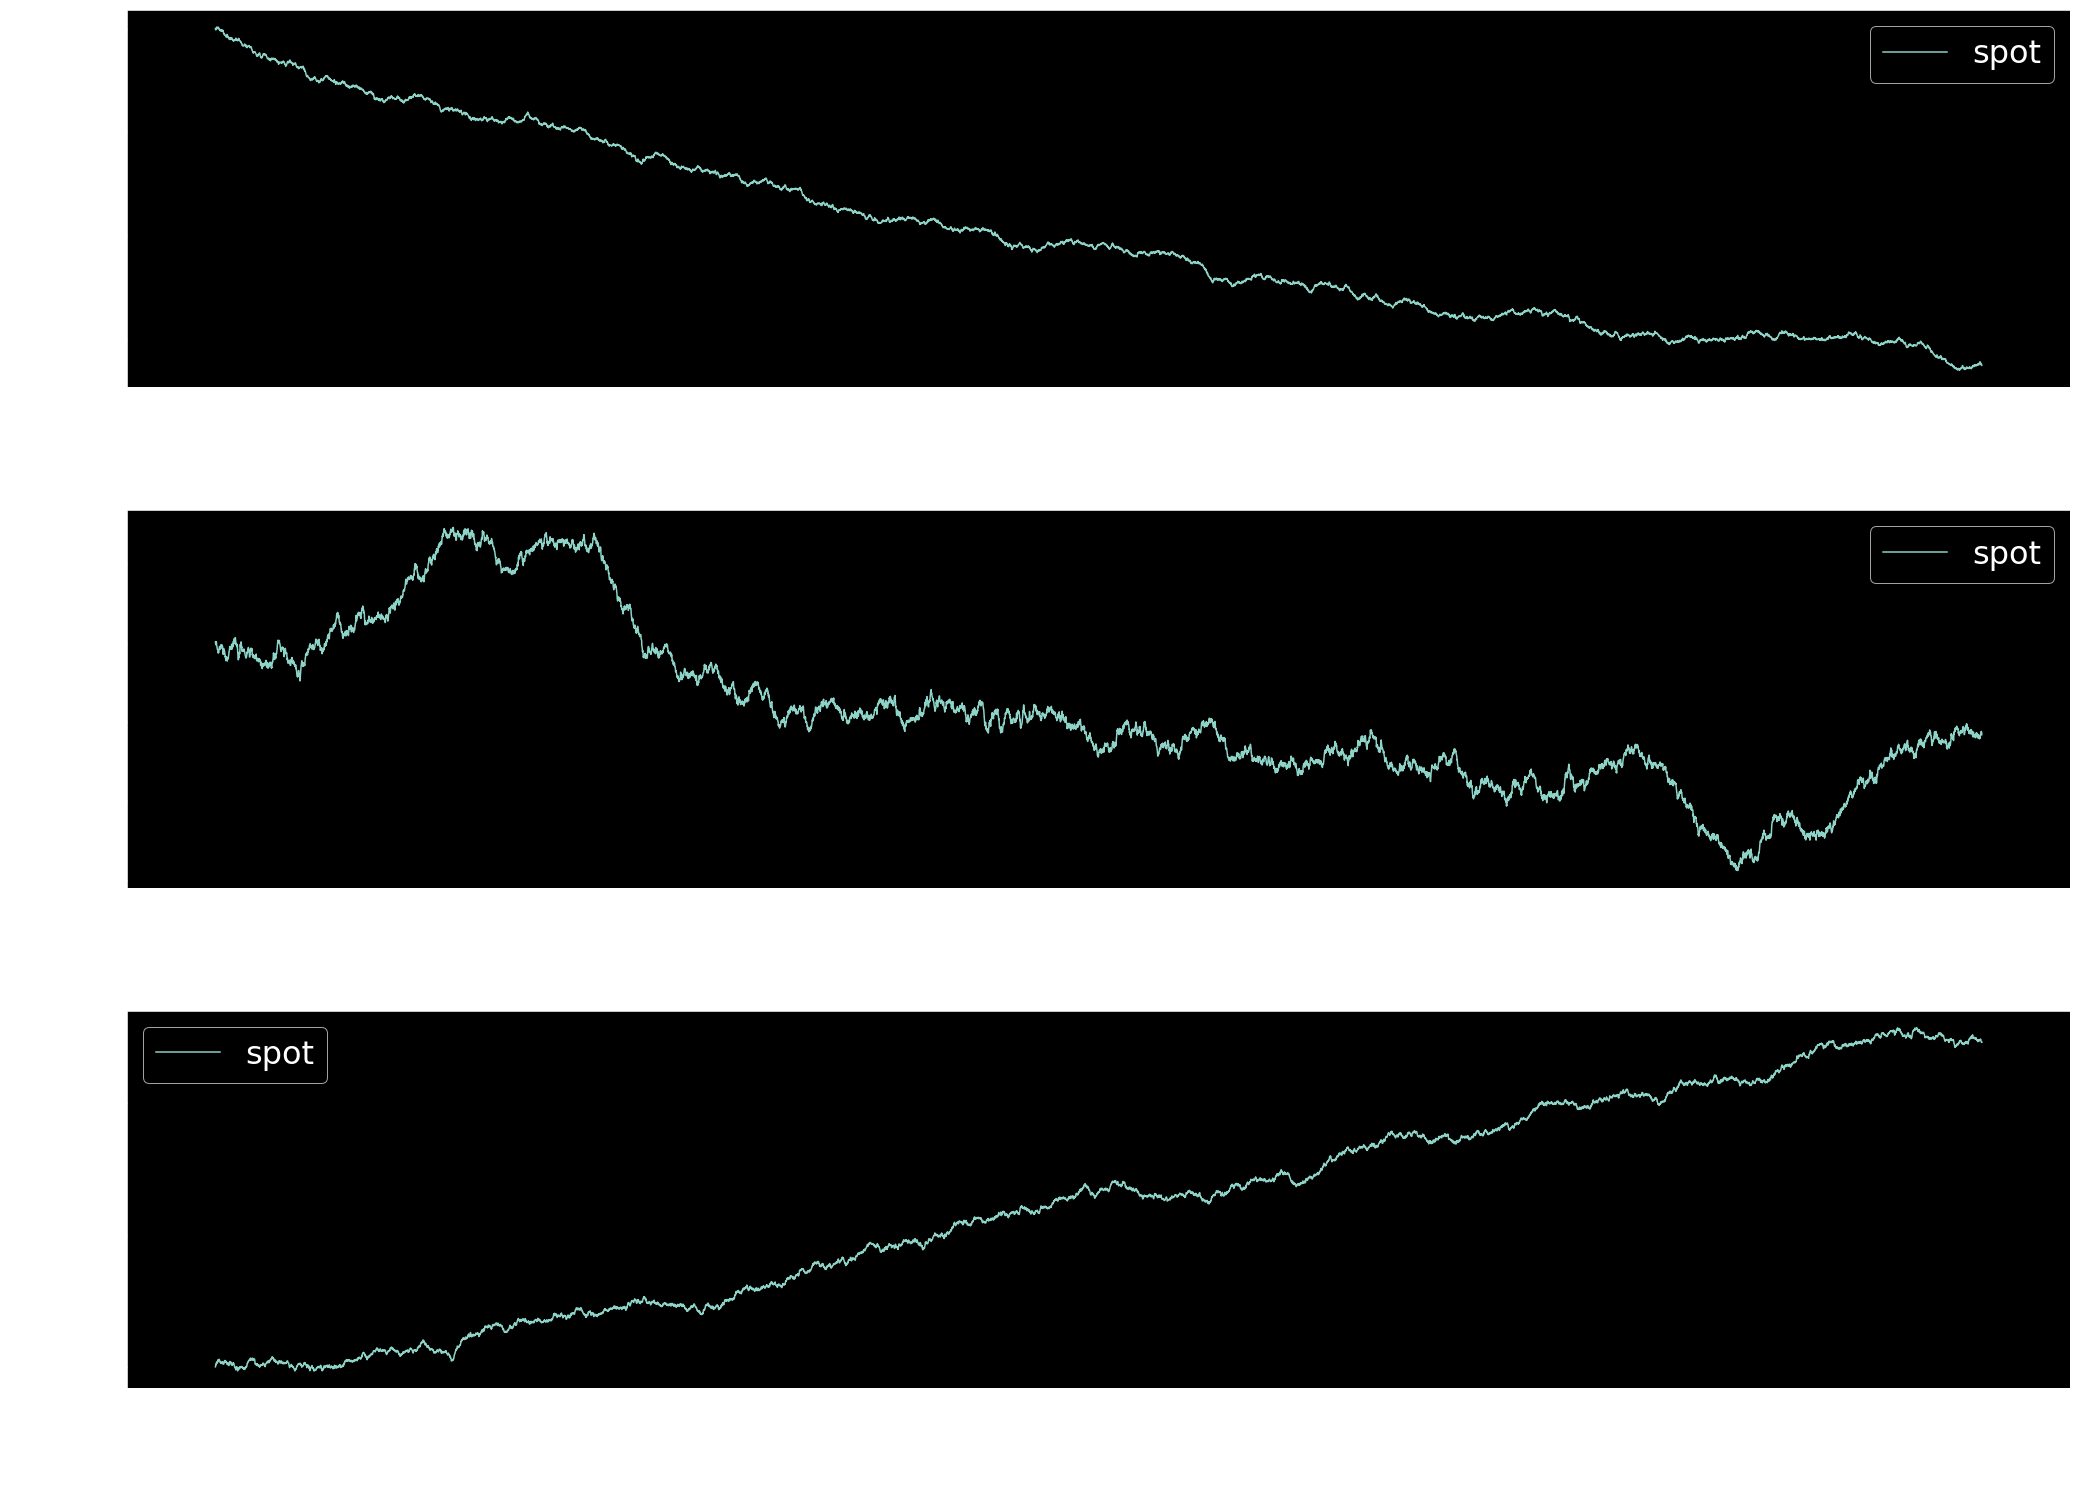

In [3]:
fig, axes = plt.subplots(figsize=(29, 21), nrows=3, ncols=1)

drifts = [-5.0, 0.0, 5.0]

X = Ito.BM(x0=0, T=T, scheme_steps=SCHEME_STEPS, vol=1)

for i, ax in enumerate(axes):
    drift = drifts[i]
    X.drift_double = drift
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\ndrift={:.2}'.format(drift), fontsize=FONT_SIZE)
    ax.set_ylabel('spot', fontsize=FONT_SIZE)
    ax.legend(prop={'size': LEGEND_SIZE})
    ax.tick_params(labelsize=FONT_SIZE)
    
plt.tight_layout()

plt.show()

## Brownian motion, with absorption at zero

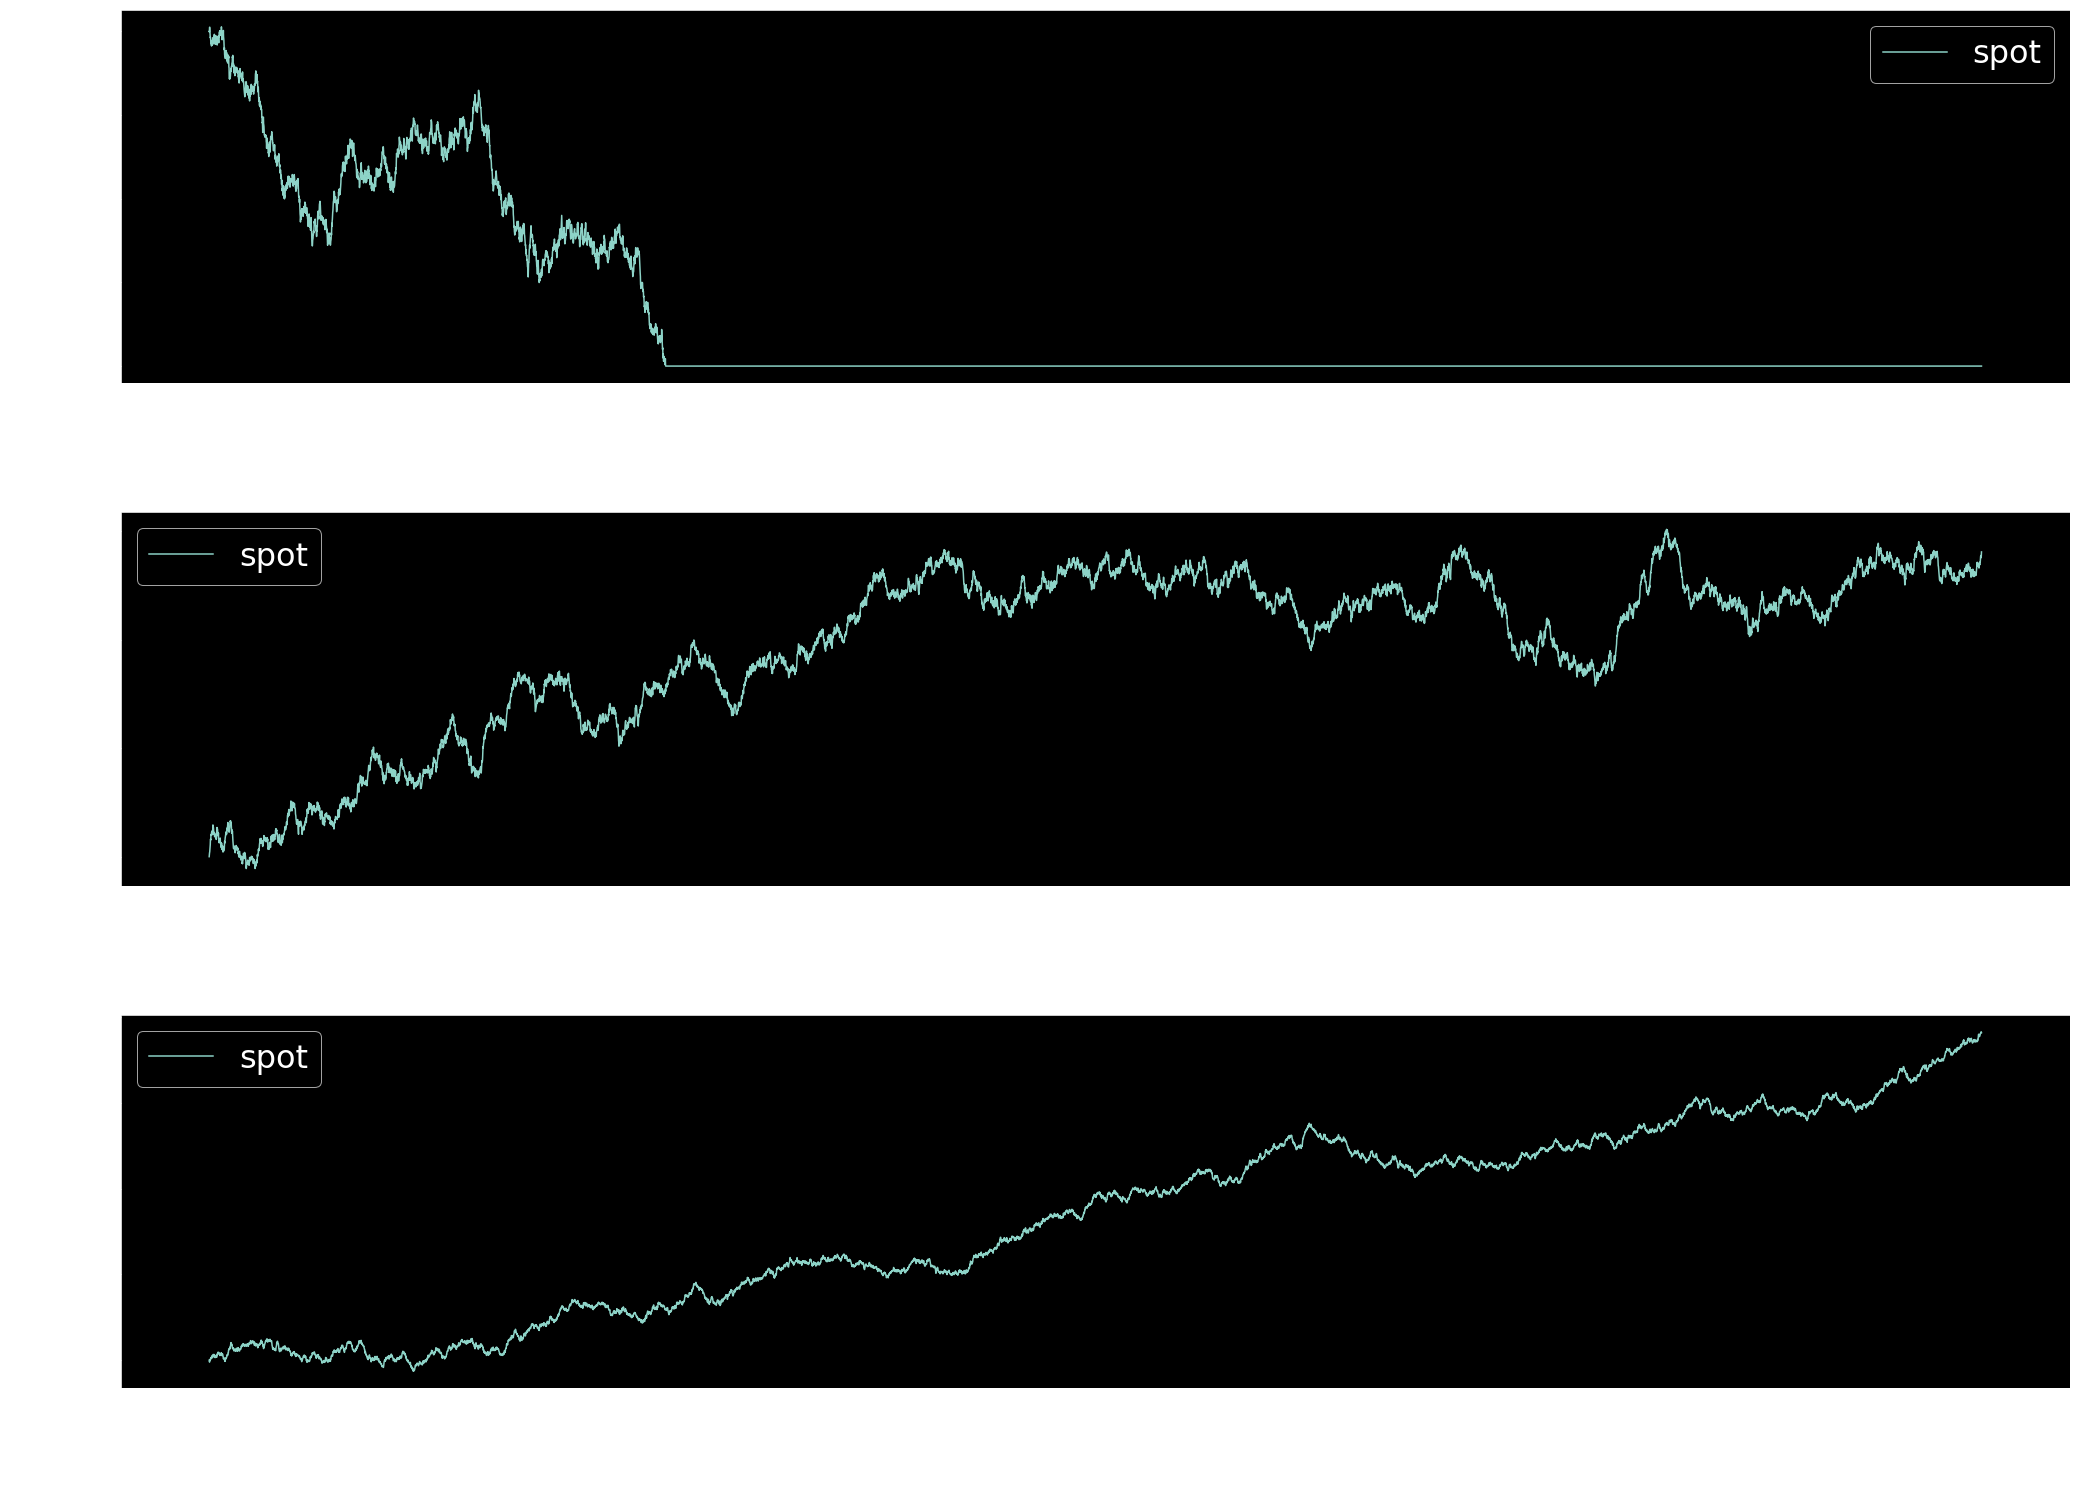

In [4]:
fig, axes = plt.subplots(figsize=(29, 21), nrows=3, ncols=1)

drifts = [-5.0, 0.0, 5.0]

X = Ito.BM(x0=1, T=T, scheme_steps=SCHEME_STEPS, vol=1,\
          barrier=0, barrier_condition='absorb')
    
for i, ax in enumerate(axes):
    drift = drifts[i]
    X.drift_double = drift
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\ndrift={:.2}'.format(drift), fontsize=FONT_SIZE)
    ax.set_ylabel('spot', fontsize=FONT_SIZE)
    ax.legend(prop={'size': LEGEND_SIZE})
    ax.tick_params(labelsize=FONT_SIZE)
    
plt.tight_layout()

plt.show()

## Geometric Brownian motion, with and without drift

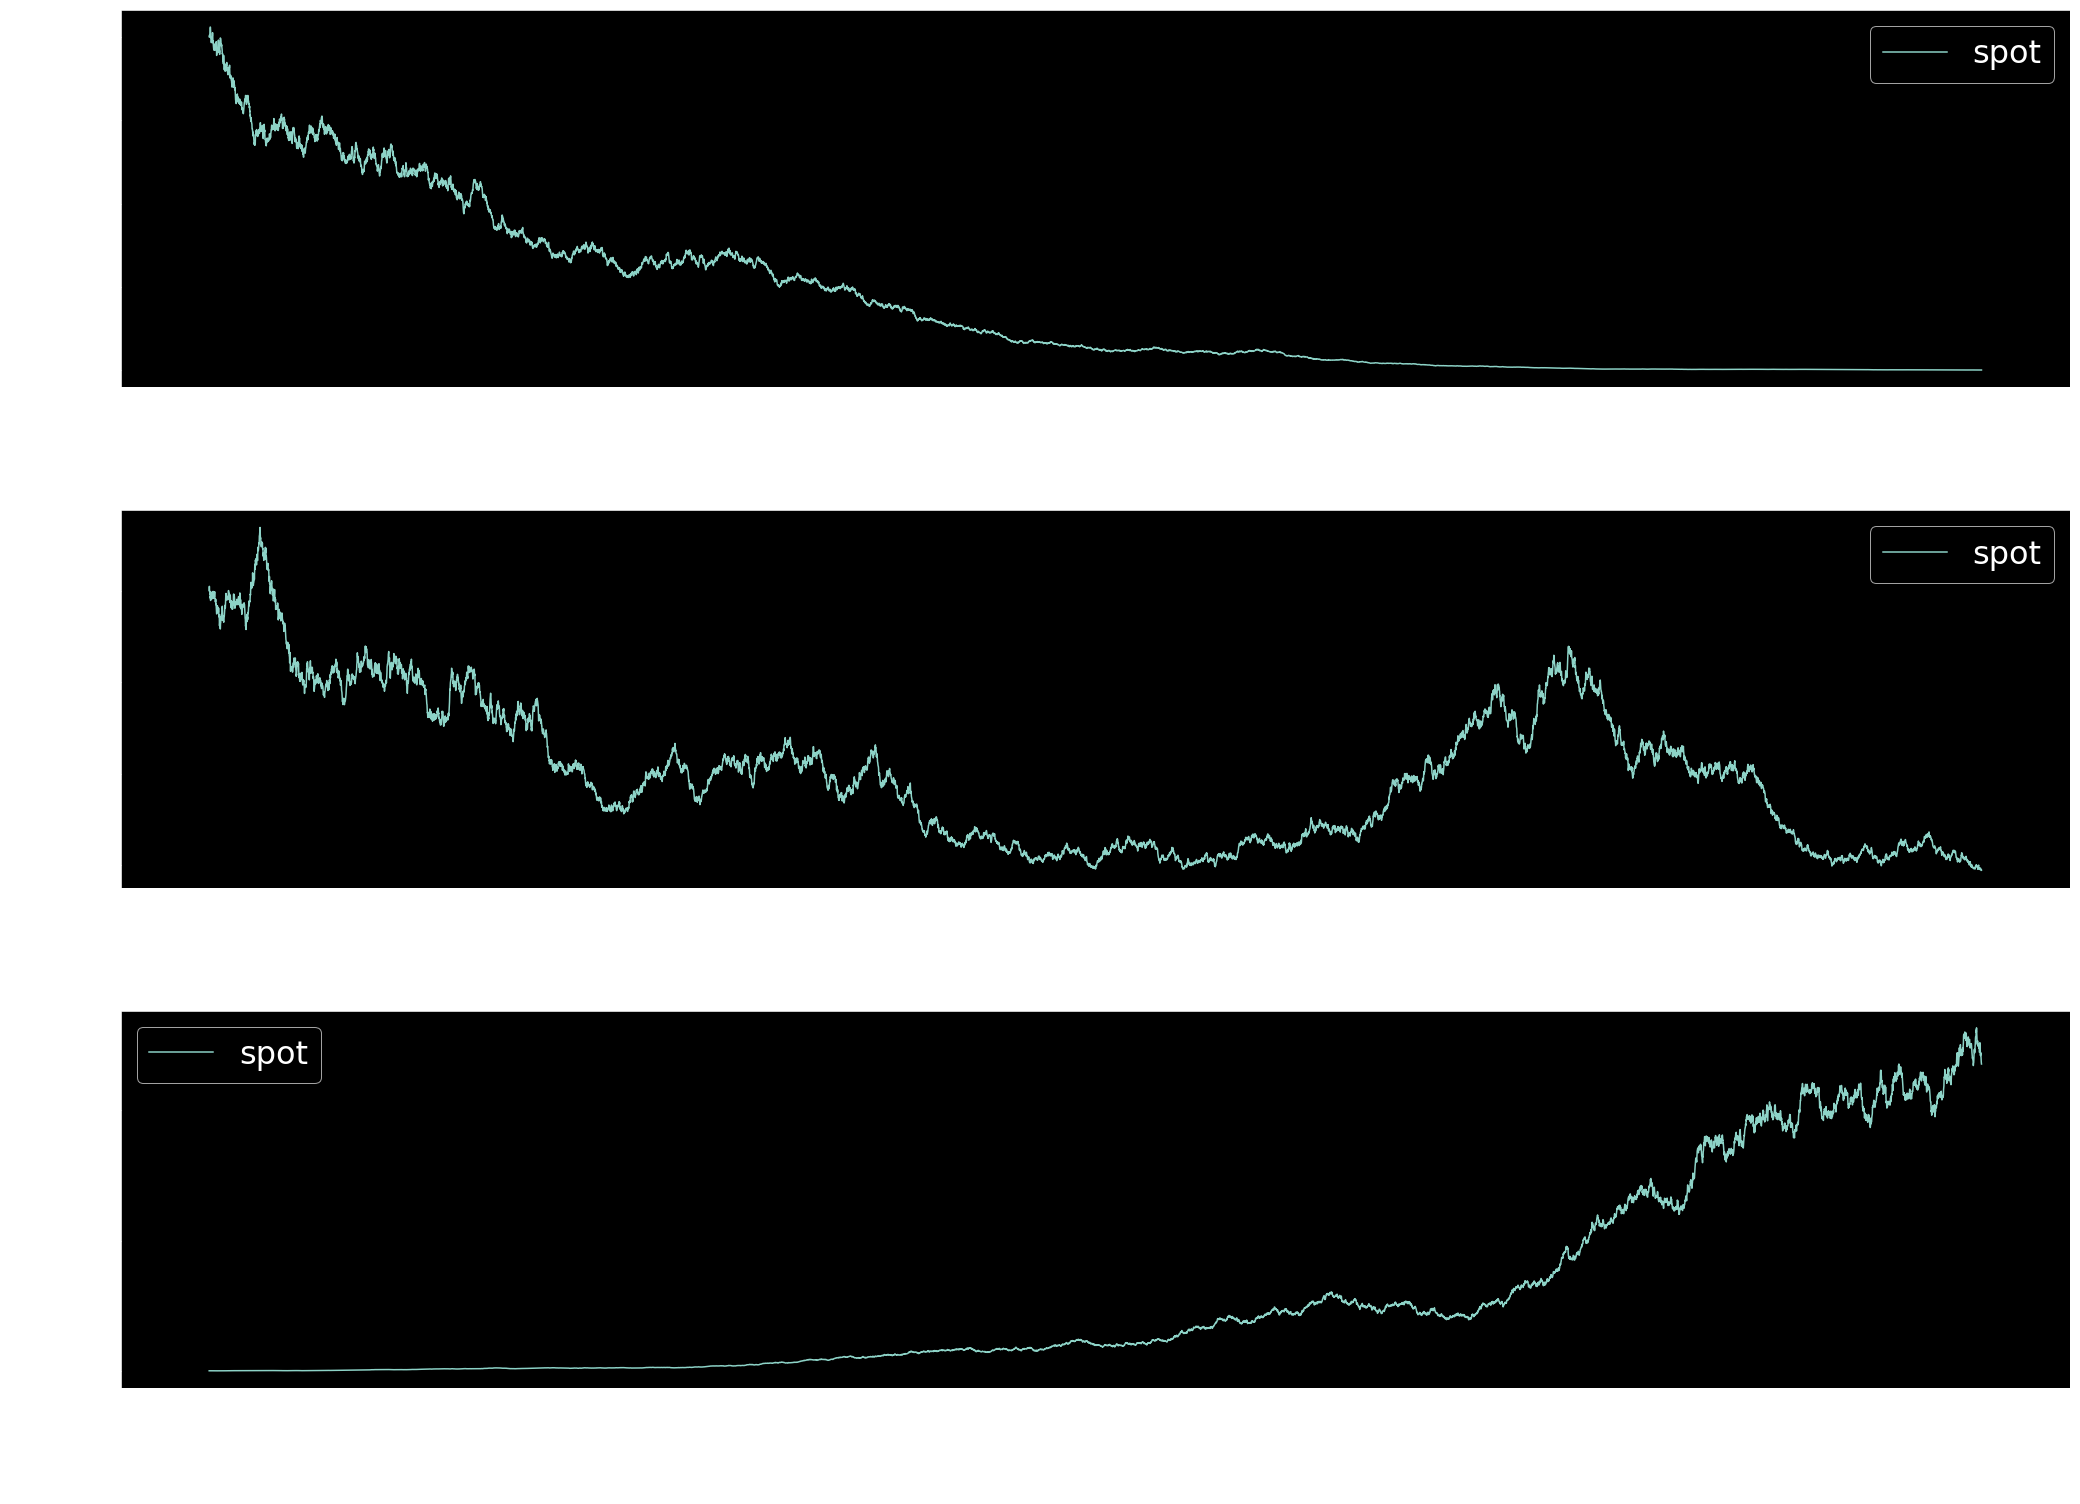

In [5]:
fig, axes = plt.subplots(figsize=(29, 21), nrows=3, ncols=1)

drifts = [-5.0, 0.0, 5.0]

X = Ito.GBM(x0=1, T=T, scheme_steps=SCHEME_STEPS, vol=1)

for i, ax in enumerate(axes):
    drift = drifts[i]
    X.drift_double = drift
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\ndrift={:.2}'.format(drift), fontsize=FONT_SIZE)
    ax.set_ylabel('spot', fontsize=FONT_SIZE)
    ax.legend(prop={'size': LEGEND_SIZE})
    ax.tick_params(labelsize=FONT_SIZE)

plt.tight_layout()
plt.show()

## Pair of correlated Brownian motions


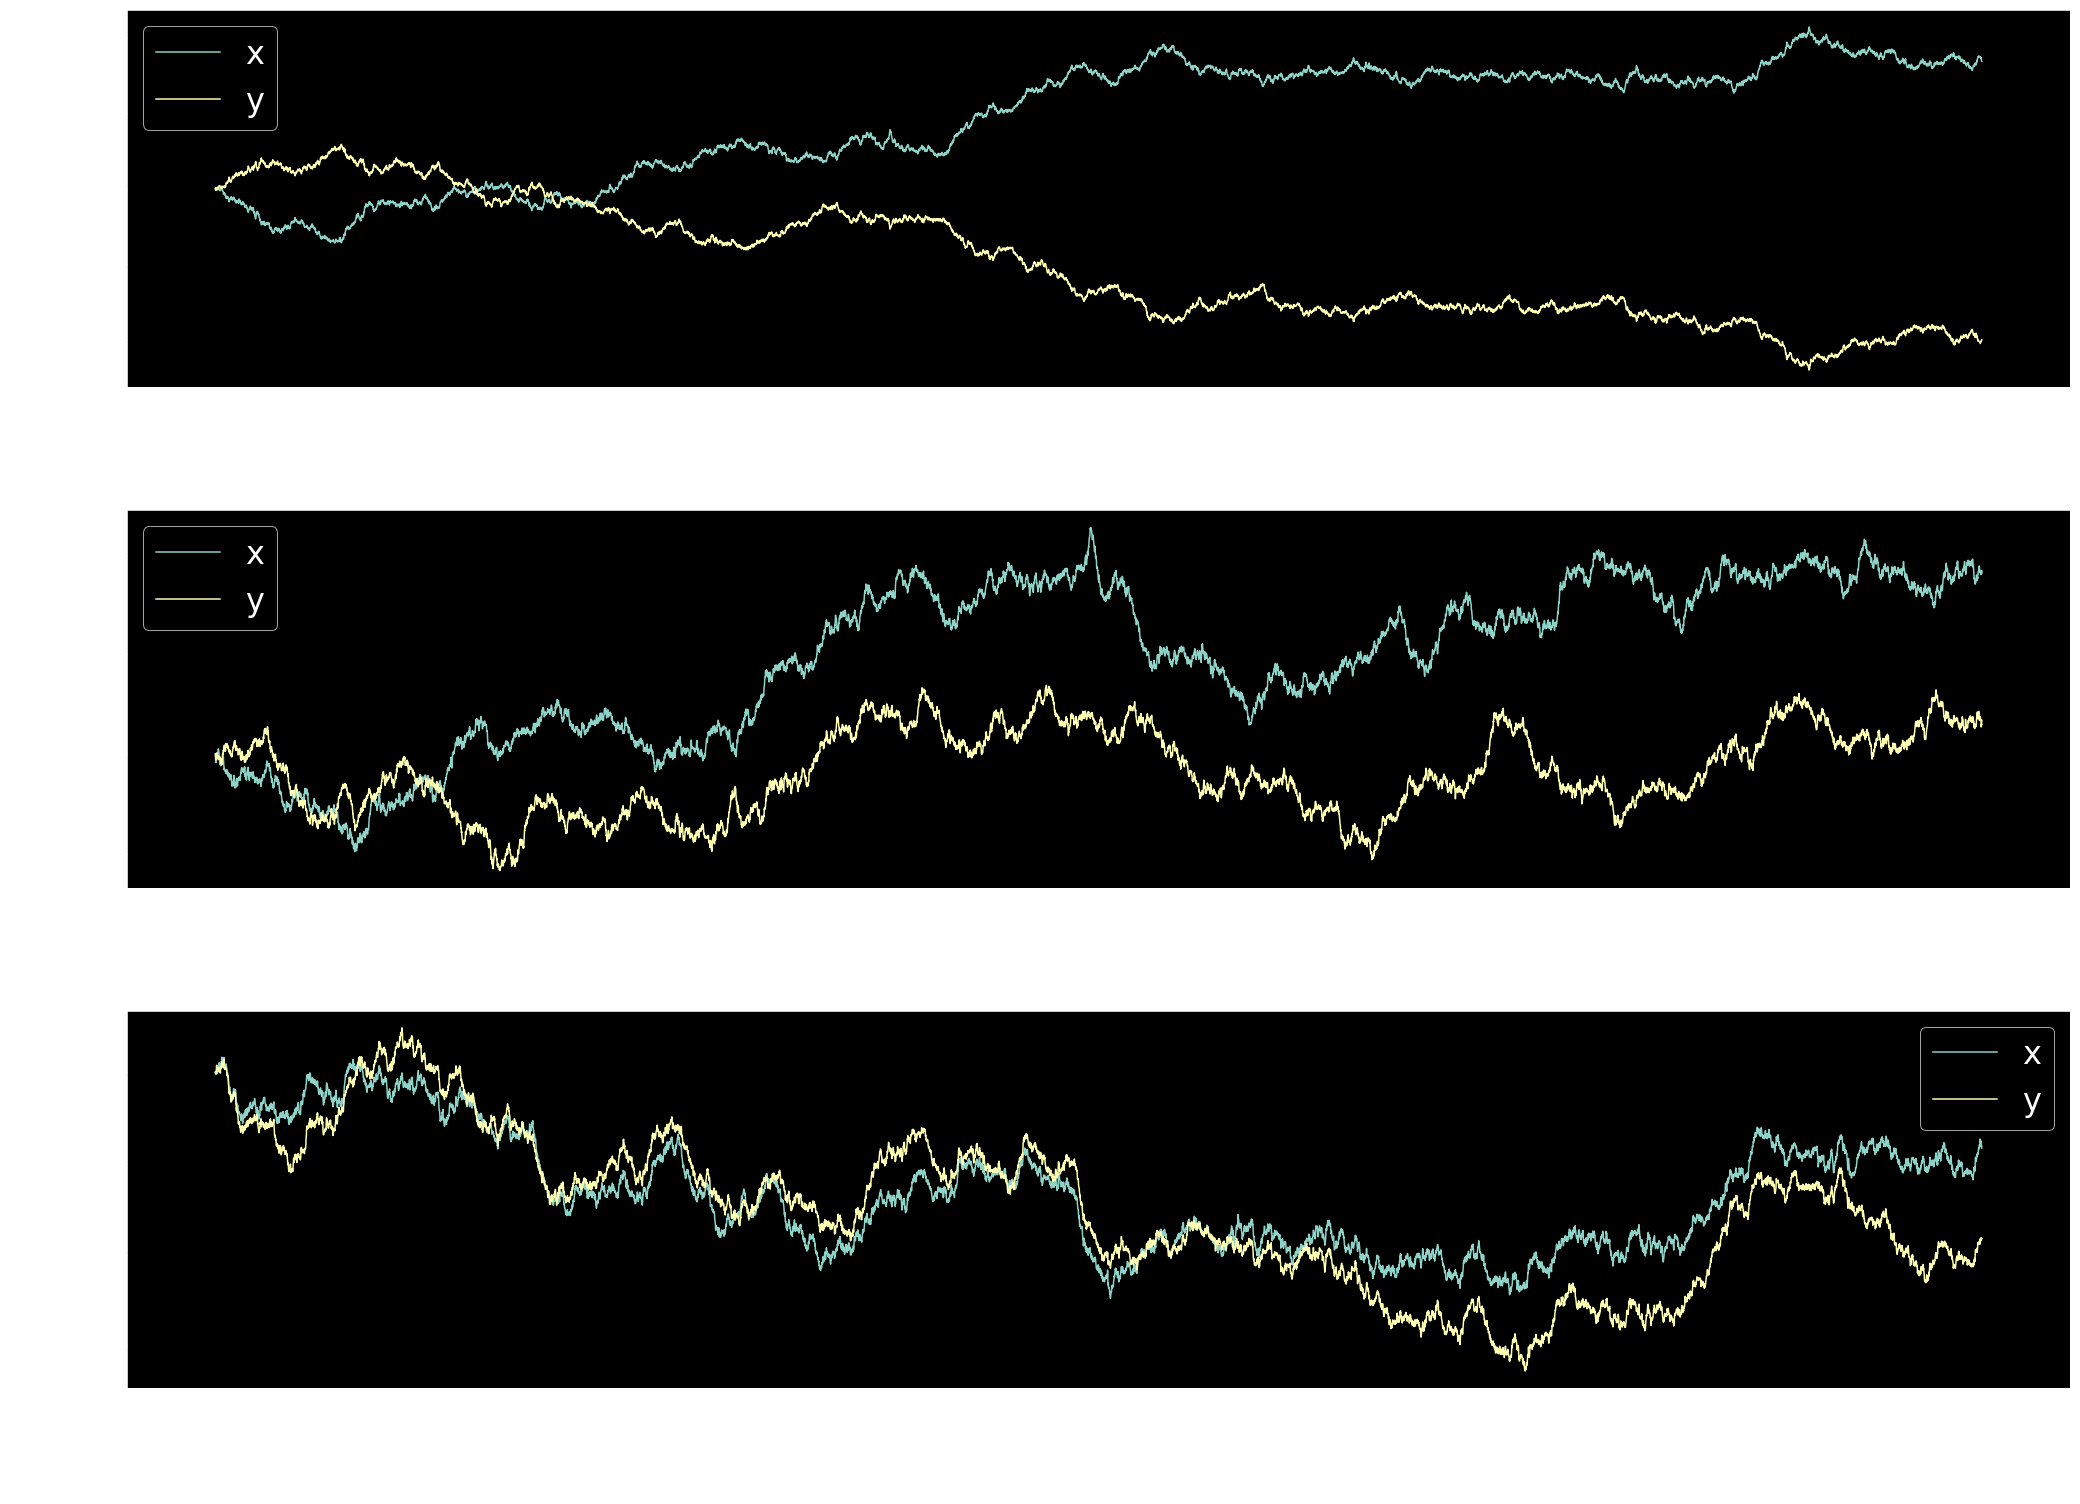

In [6]:
fig, axes = plt.subplots(figsize=(29, 21), nrows=3, ncols=1)

x0 = [0,0]
drift = [0,0]
rhos = [-0.5, 0, 0.5]

X = Ito.BM_multi_d(x0=x0, T=T, drift=drift, vol=np.eye(2),\
                   scheme_steps=SCHEME_STEPS, keys=['x', 'y'])

for i, ax in enumerate(axes):
    rho = rhos[i]
    vol = [[1,rho],[rho,1]]    
    X.rho = rho
    X.vol_matrix = vol
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\ndrho={:.0%}'.format(rho), fontsize=FONT_SIZE)
    ax.set_ylabel('spot', fontsize=FONT_SIZE)
    ax.legend(prop={'size': LEGEND_SIZE})
    ax.tick_params(labelsize=FONT_SIZE)

plt.tight_layout()
plt.show()

## Pair of correlated Brownian motions with absorption along different coordinates

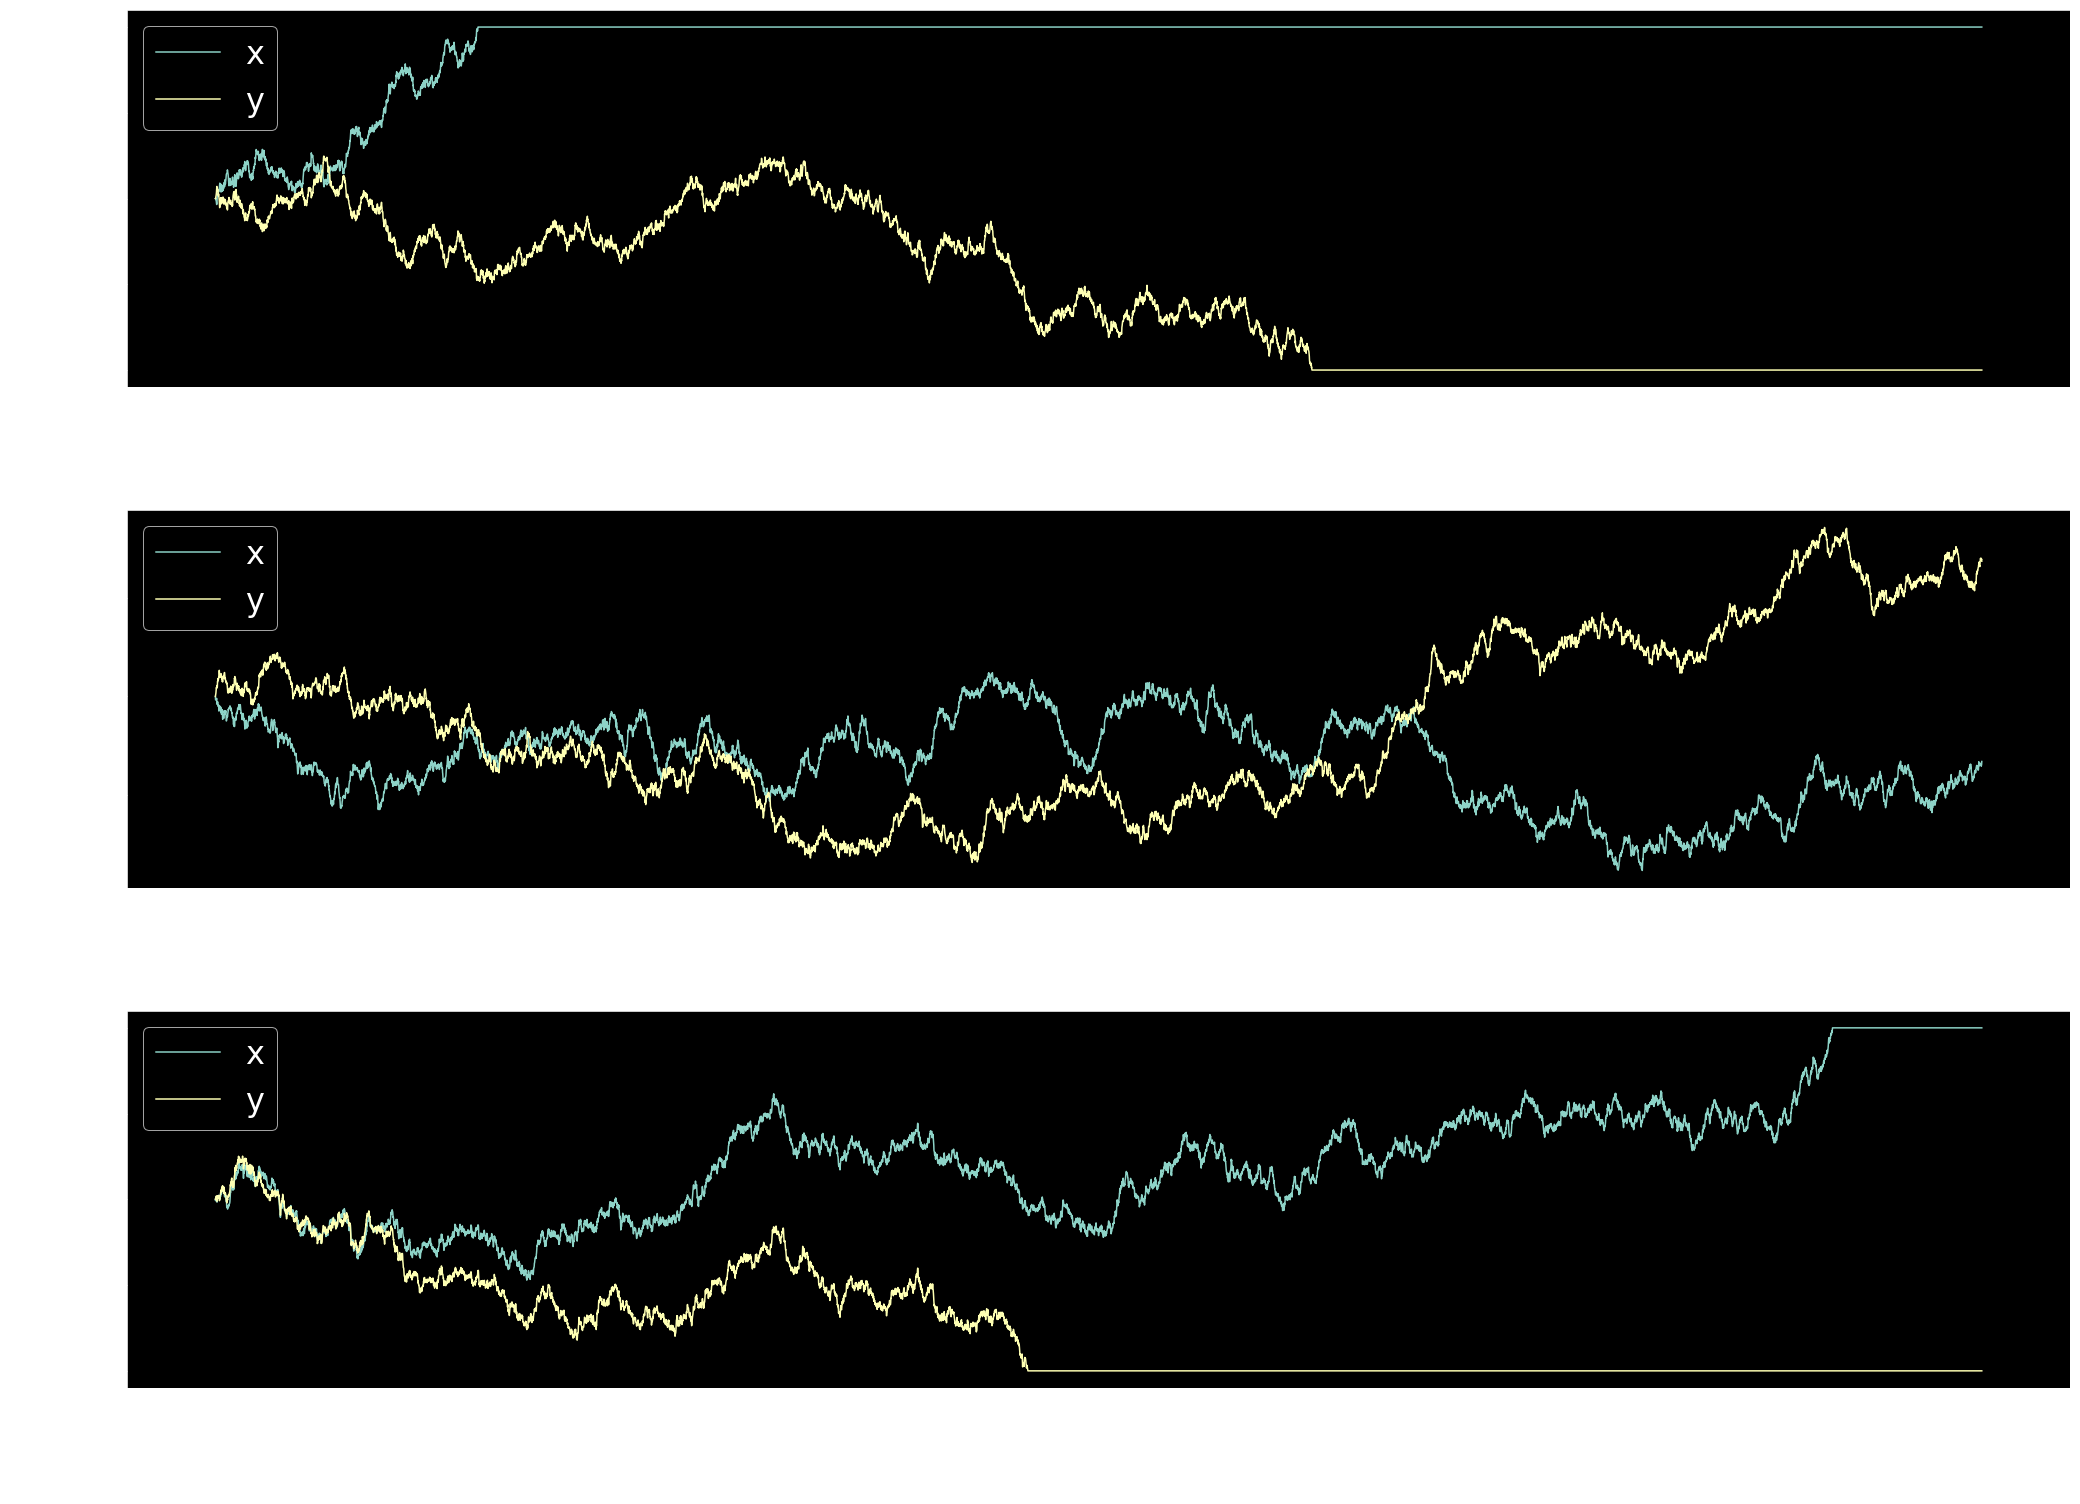

In [7]:
fig, axes = plt.subplots(figsize=(29, 21), nrows=3, ncols=1)

x0 = [0,0]
drift = [0,0]
rhos = [-0.5, 0, 0.5]

X = Ito.BM_multi_d(x0=x0, T=T, scheme_steps=SCHEME_STEPS, vol=np.eye(2),\
                   keys=['x', 'y'], barrier=[1, -1], barrier_condition='absorb')

for i, ax in enumerate(axes):
    rho = rhos[i]
    vol = [[1,rho],[rho,1]]    
    X.rho = rho
    X.vol_matrix = vol
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\ndrho={:.0%}'.format(rho), fontsize=FONT_SIZE)
    ax.set_ylabel('spot', fontsize=FONT_SIZE)
    ax.legend(prop={'size': LEGEND_SIZE})
    ax.tick_params(labelsize=FONT_SIZE)

plt.tight_layout()
plt.show()

## Pair of correlated geometric Brownian motions

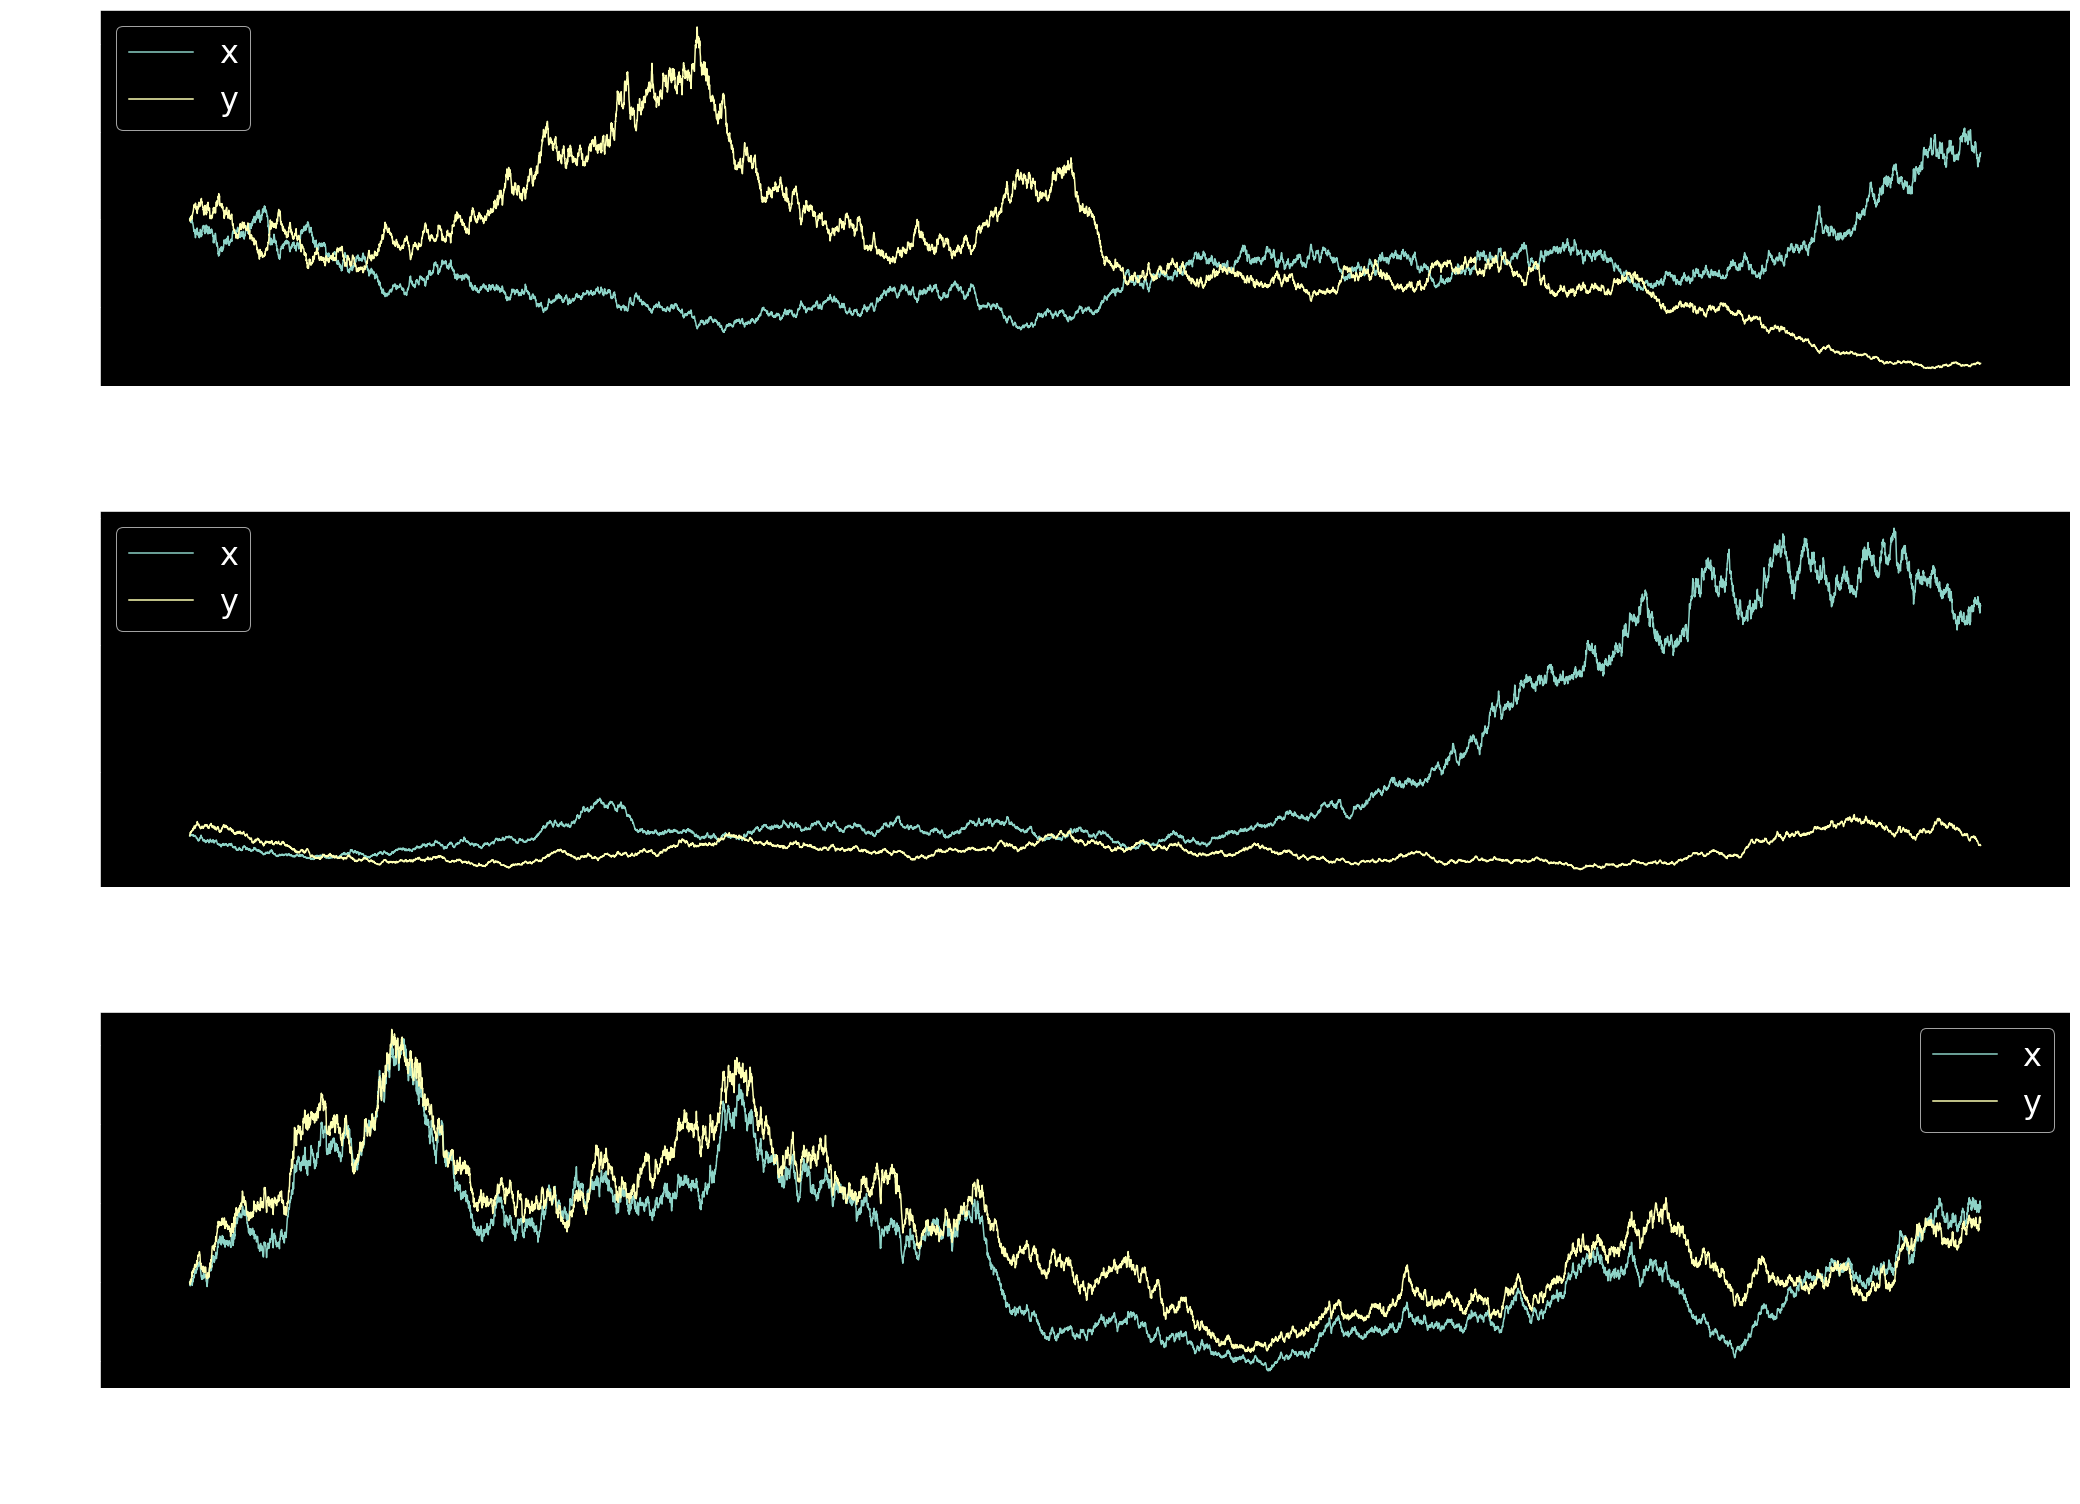

In [8]:
fig, axes = plt.subplots(figsize=(29, 21), nrows=3, ncols=1)

x0 = [1,1]
drift = [0,0]
rhos = [-0.5, 0, 0.5]

X = Ito.GBM_multi_d(x0=x0, T=T, vol=np.eye(2), scheme_steps=SCHEME_STEPS, keys=['x', 'y'])

for i, ax in enumerate(axes):
    rho = rhos[i]
    vol = [[1,rho],[rho,1]]    
    X.rho = rho
    X.vol_matrix = vol
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\nrho={:.0%}'.format(rho), fontsize=FONT_SIZE)
    ax.set_ylabel('spot', fontsize=FONT_SIZE)
    ax.legend(prop={'size': LEGEND_SIZE})
    ax.tick_params(labelsize=FONT_SIZE)

plt.tight_layout()
plt.show()

## Stochastic vol diffusion (SABR) sample paths

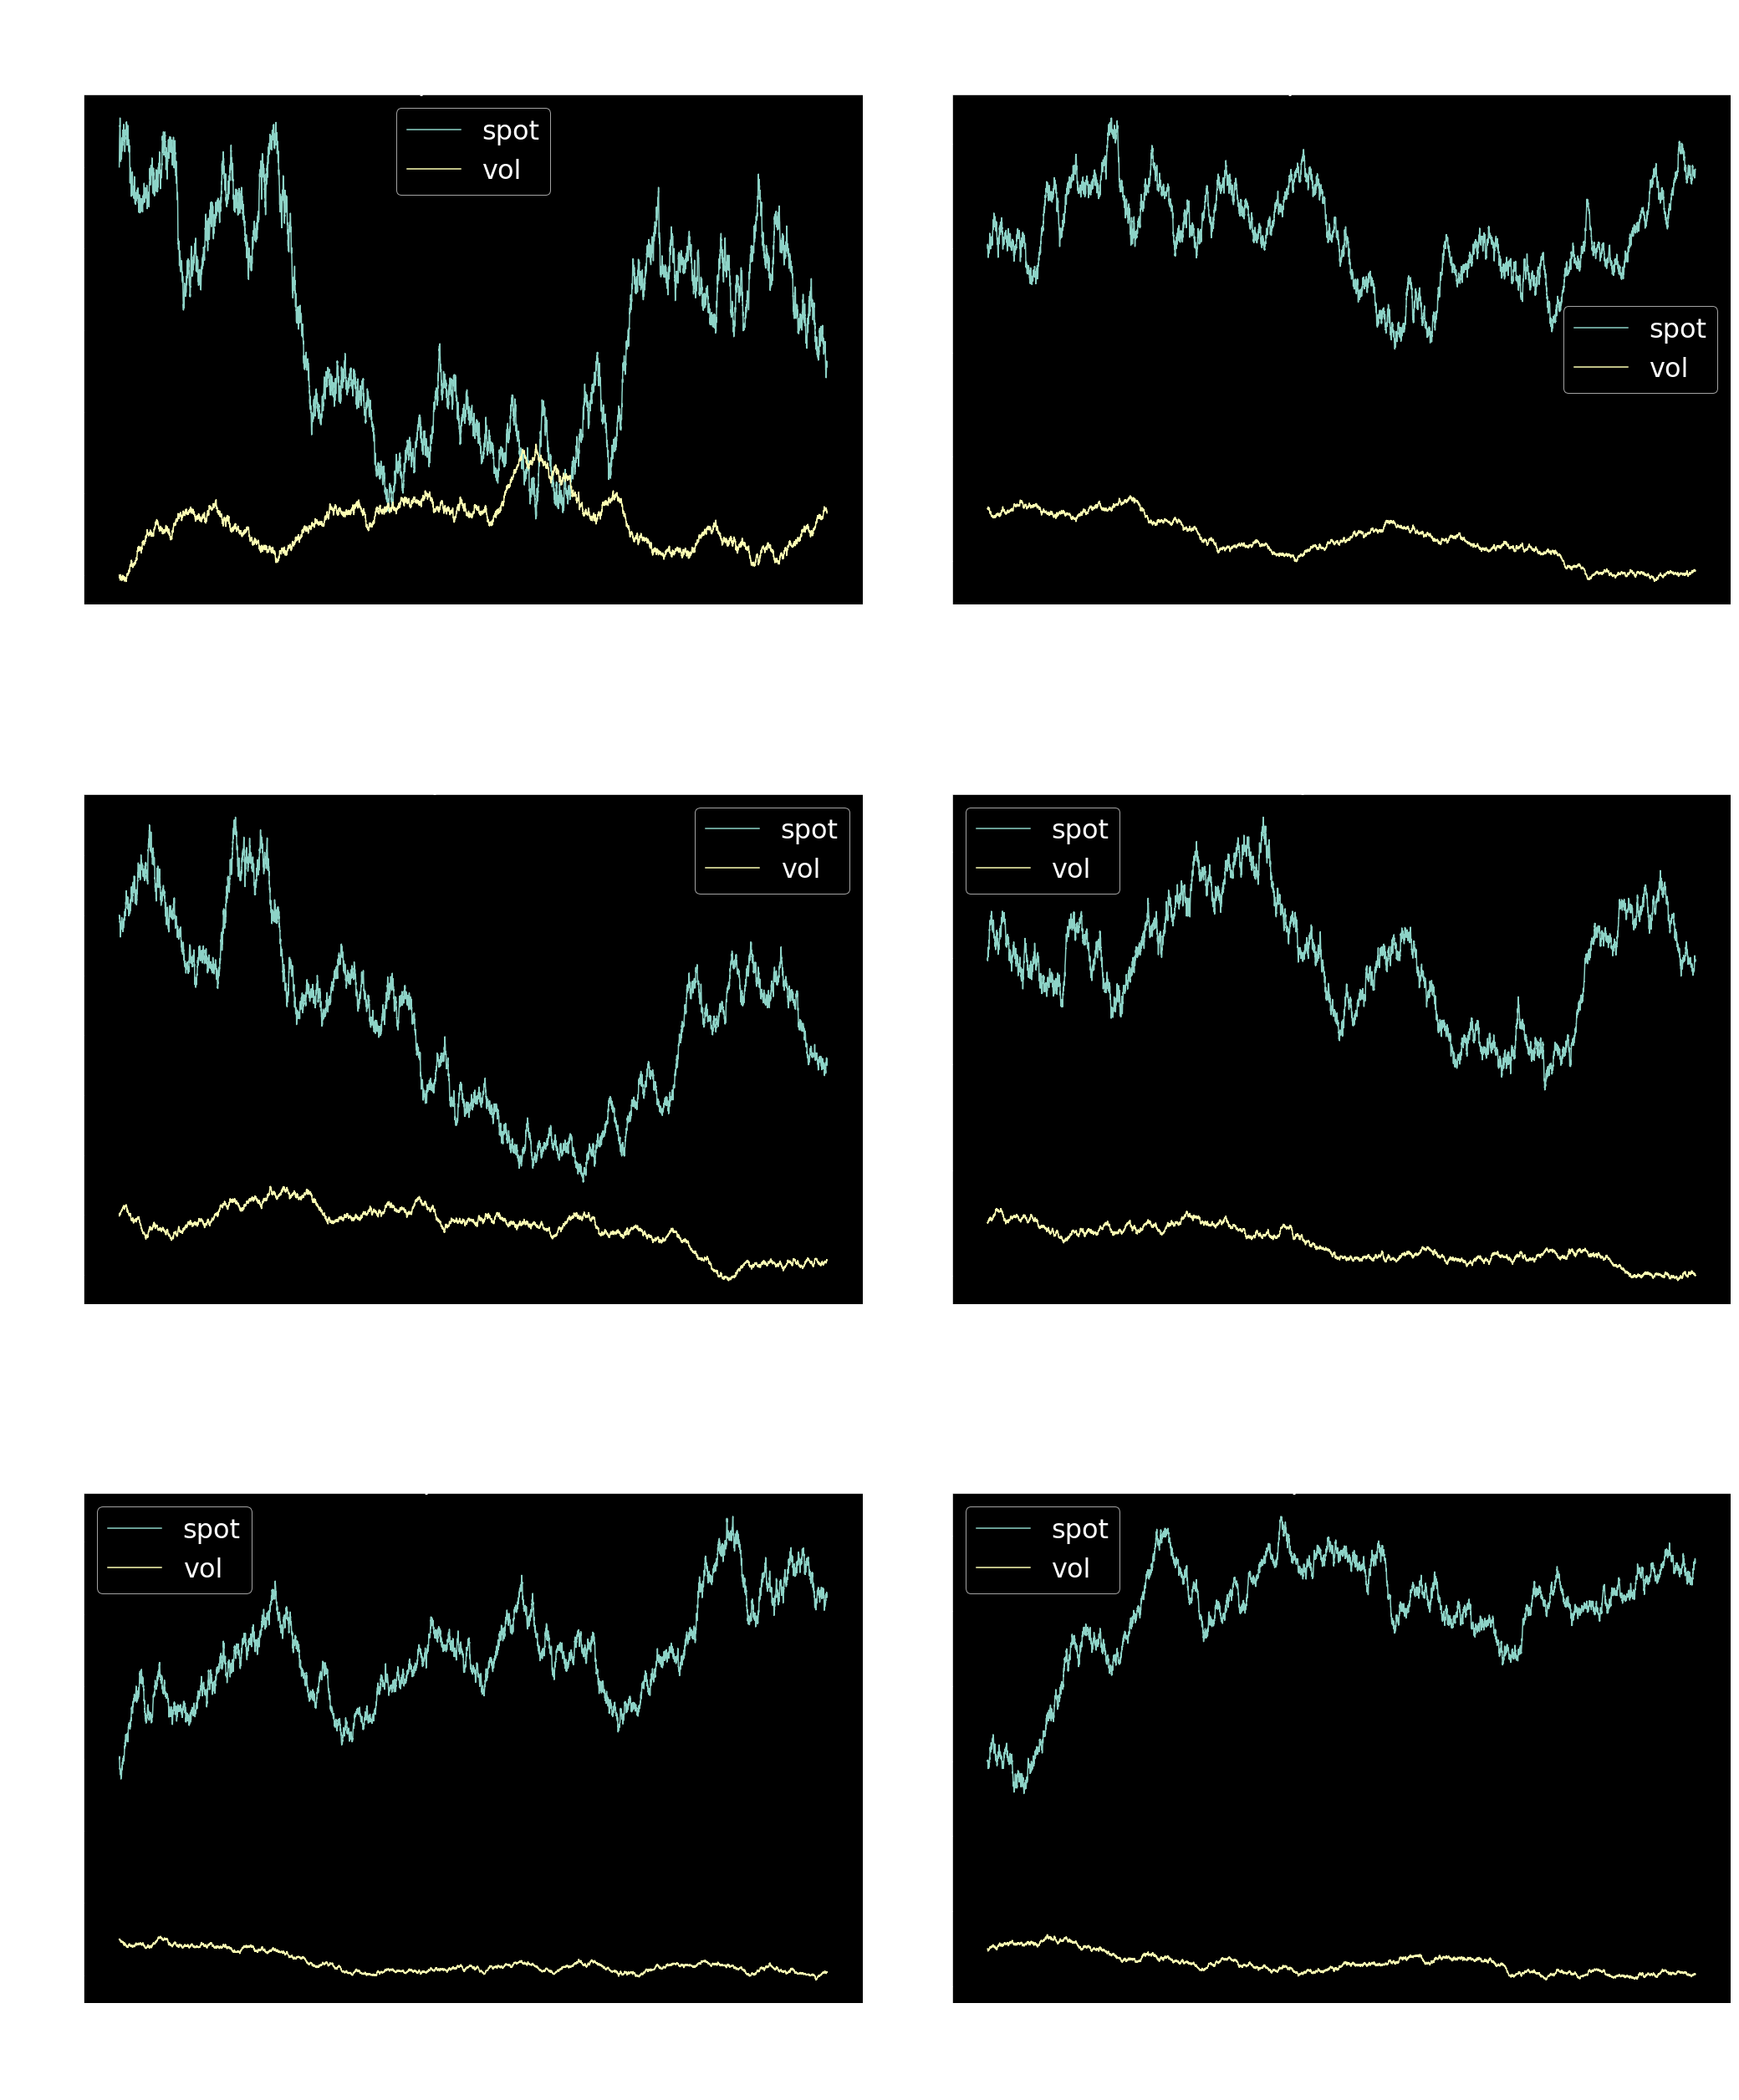

In [9]:
fig, axes = plt.subplots(figsize=(29, 35), nrows=3, ncols=2)

x0 = [1, 0.5]

params = [
    [1.0, 0.2, -0.5],
    [1.0, 0.2, 0.0],
    [1.0, 0.2, 0.5],
    [0.0, 0.2, -0.5],
    [0.0, 0.2, 0.0],
    [0.0, 0.2, 0.5],
]


X = Ito.SABR(x0=x0, T=T, scheme_steps=SCHEME_STEPS, keys=['spot', 'vol'])
    
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        beta = params[i+3*j][0]
        vov = params[i+3*j][1]
        rho = params[i+3*j][2]
        X.beta = beta
        X.vov = vov
        X.rho = rho
        
        df = X.simulate()
        df.plot(kind='line', ax=ax)

        ax.set_xlabel('time\n', fontsize=FONT_SIZE)
        ax.set_ylabel('spot', fontsize=FONT_SIZE)
        ax.legend(prop={'size': LEGEND_SIZE})
        ax.tick_params(labelsize=FONT_SIZE)
        ax.set_title(r'$\beta$={:.2}'.format(beta)+'\n'\
                     r'vov={:.0%}'.format(vov)+'\n'\
                     r'$\rho$={:.0%}'.format(rho),\
                     fontsize=FONT_SIZE)
plt.tight_layout()
plt.show()

## Stochastic vol diffusion (SABR) sample paths with absorption

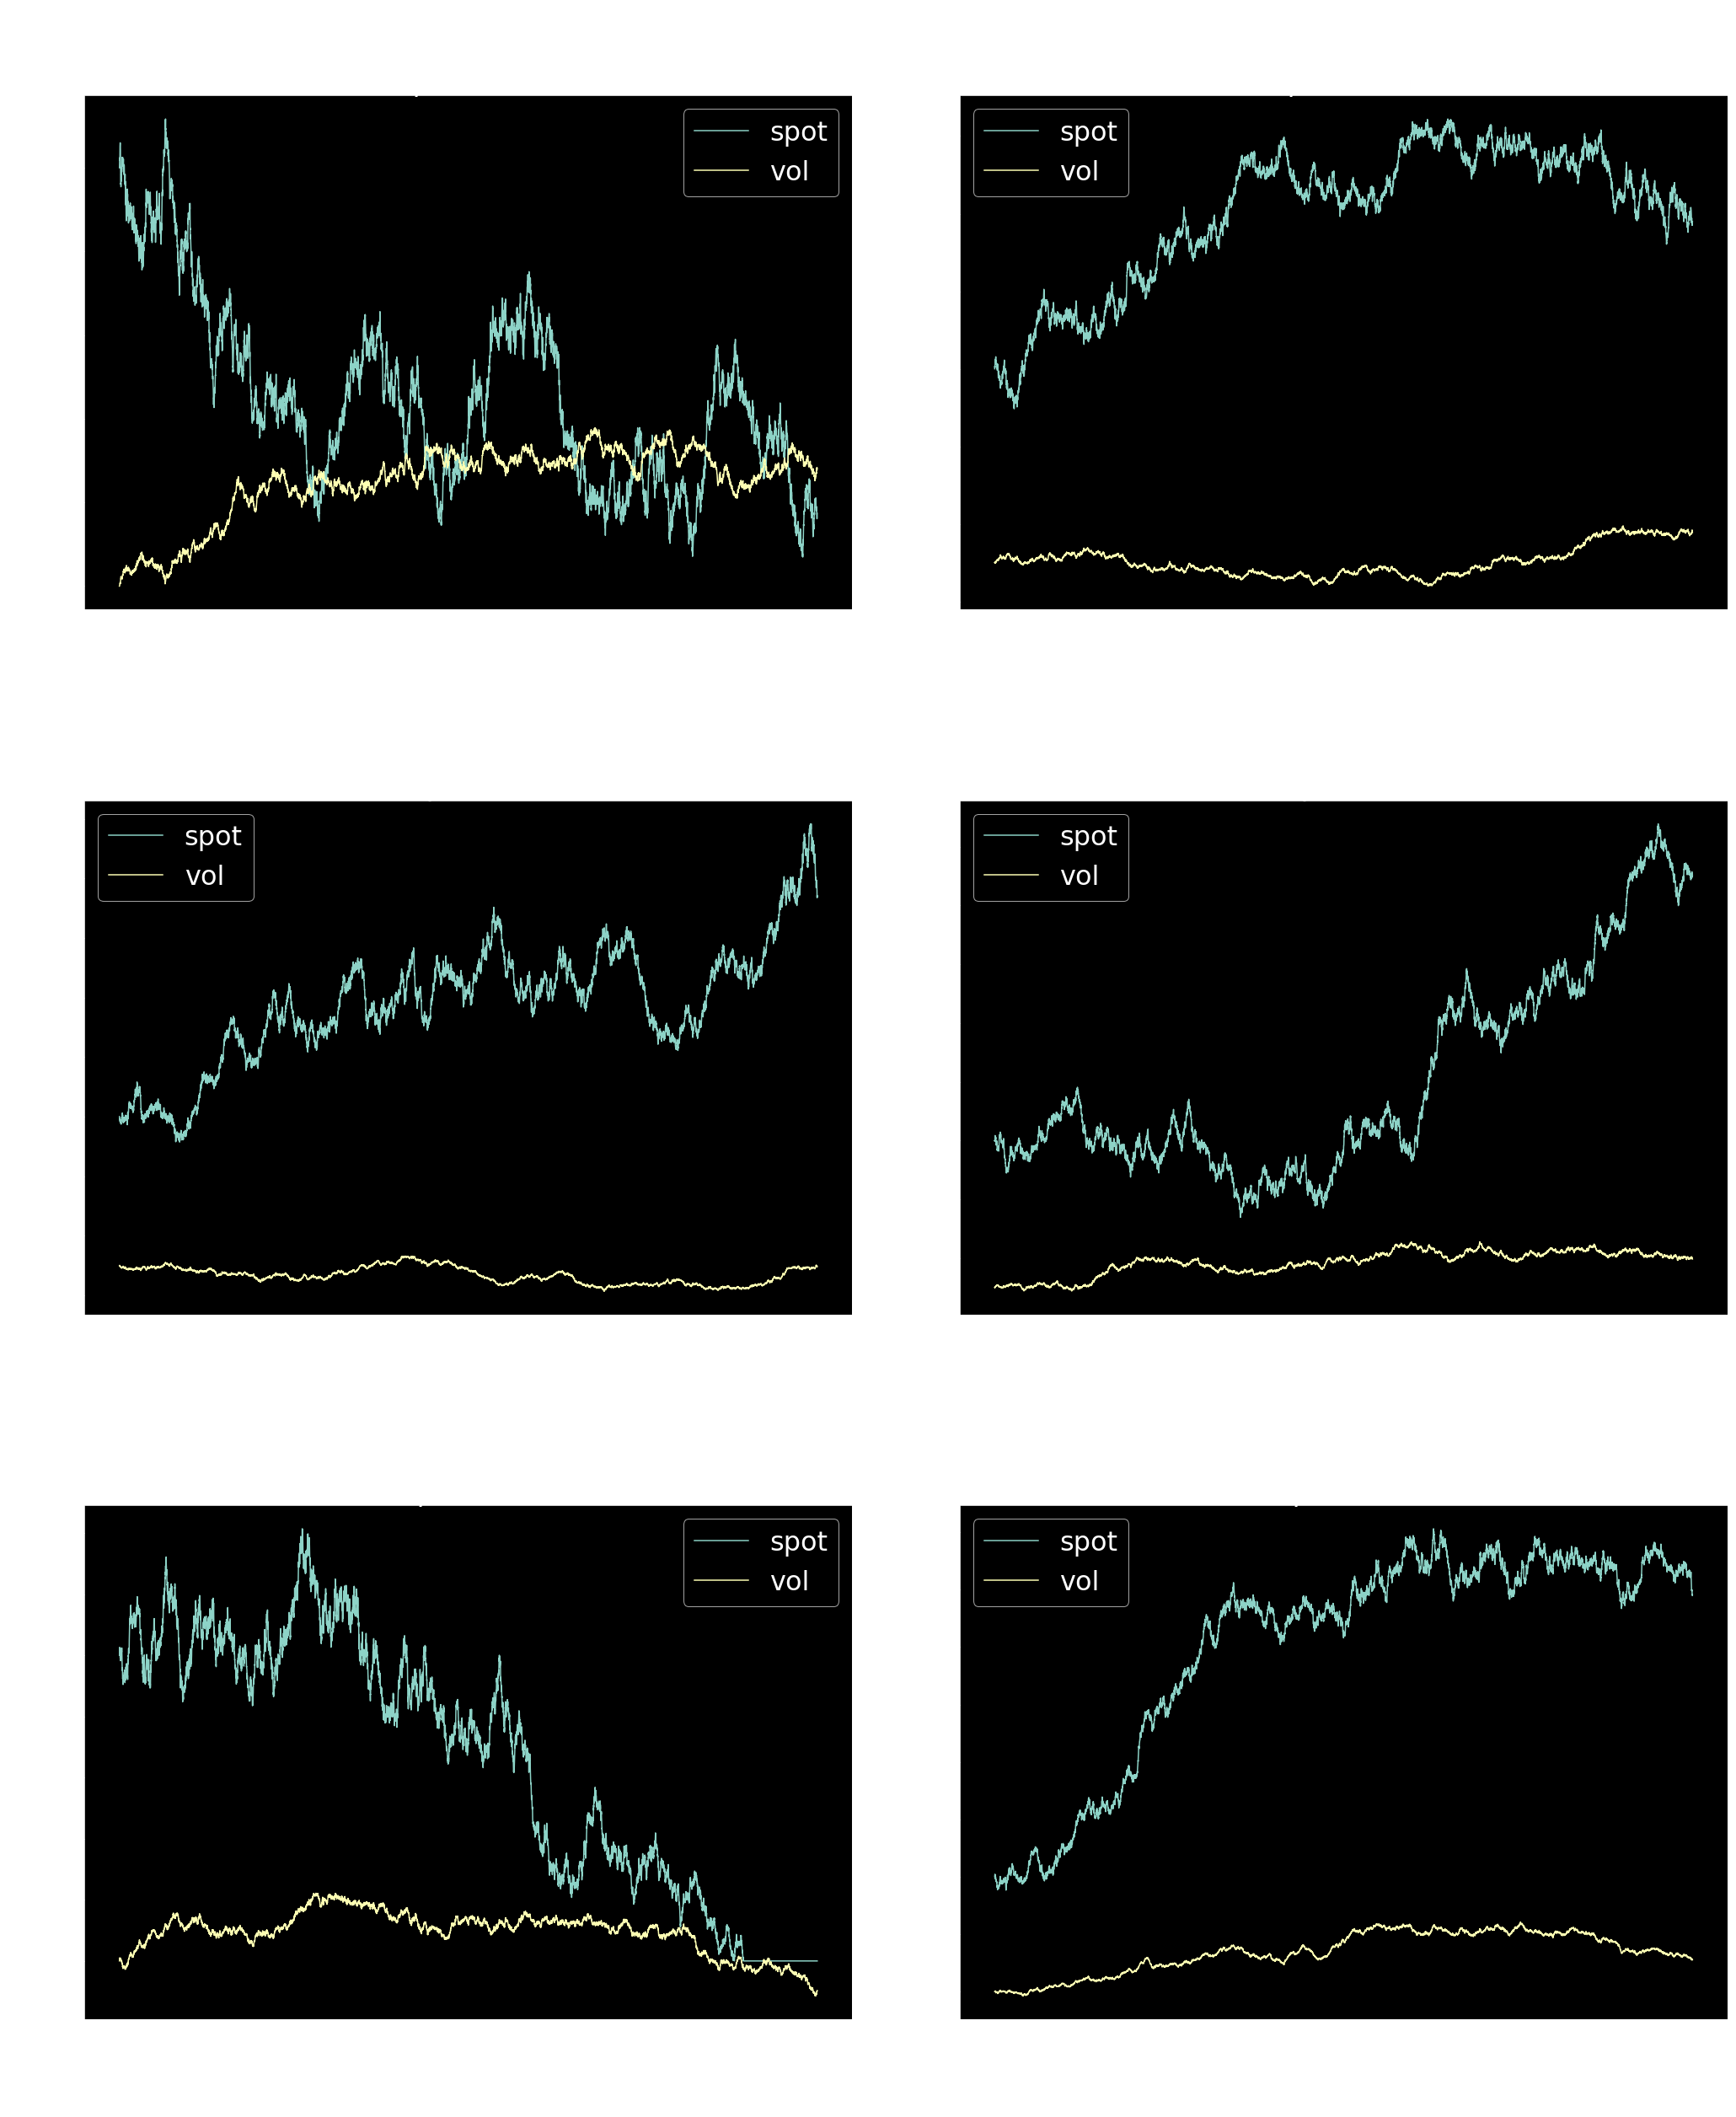

In [10]:
fig, axes = plt.subplots(figsize=(29, 35), nrows=3, ncols=2)

x0 = [1, 0.5]

params = [
    [1.0, 0.2, -0.5],
    [1.0, 0.2, 0.0],
    [1.0, 0.2, 0.5],
    [0.0, 0.2, -0.5],
    [0.0, 0.2, 0.0],
    [0.0, 0.2, 0.5],
]

X = Ito.SABR(x0=x0, T=T, scheme_steps=SCHEME_STEPS, keys=['spot', 'vol'],\
             barrier=[0.5, None], barrier_condition='absorb')

for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        beta = params[i+3*j][0]
        vov = params[i+3*j][1]
        rho = params[i+3*j][2]
        X.beta = beta
        X.vov = vov
        X.rho = rho

        df = X.simulate()
        df.plot(kind='line', ax=ax)

        ax.set_xlabel('time\n', fontsize=FONT_SIZE)
        ax.set_ylabel('spot', fontsize=FONT_SIZE)
        ax.legend(prop={'size': LEGEND_SIZE})
        ax.tick_params(labelsize=FONT_SIZE)
        ax.set_title(r'$\beta$={:.2}'.format(beta)+'\n'\
                     r'vov={:.0%}'.format(vov)+'\n'\
                     r'$\rho$={:.0%}'.format(rho),\
                     fontsize=FONT_SIZE)
plt.tight_layout()
plt.show()

## Pseudo Geometric Brownian motion
With increasing volatility

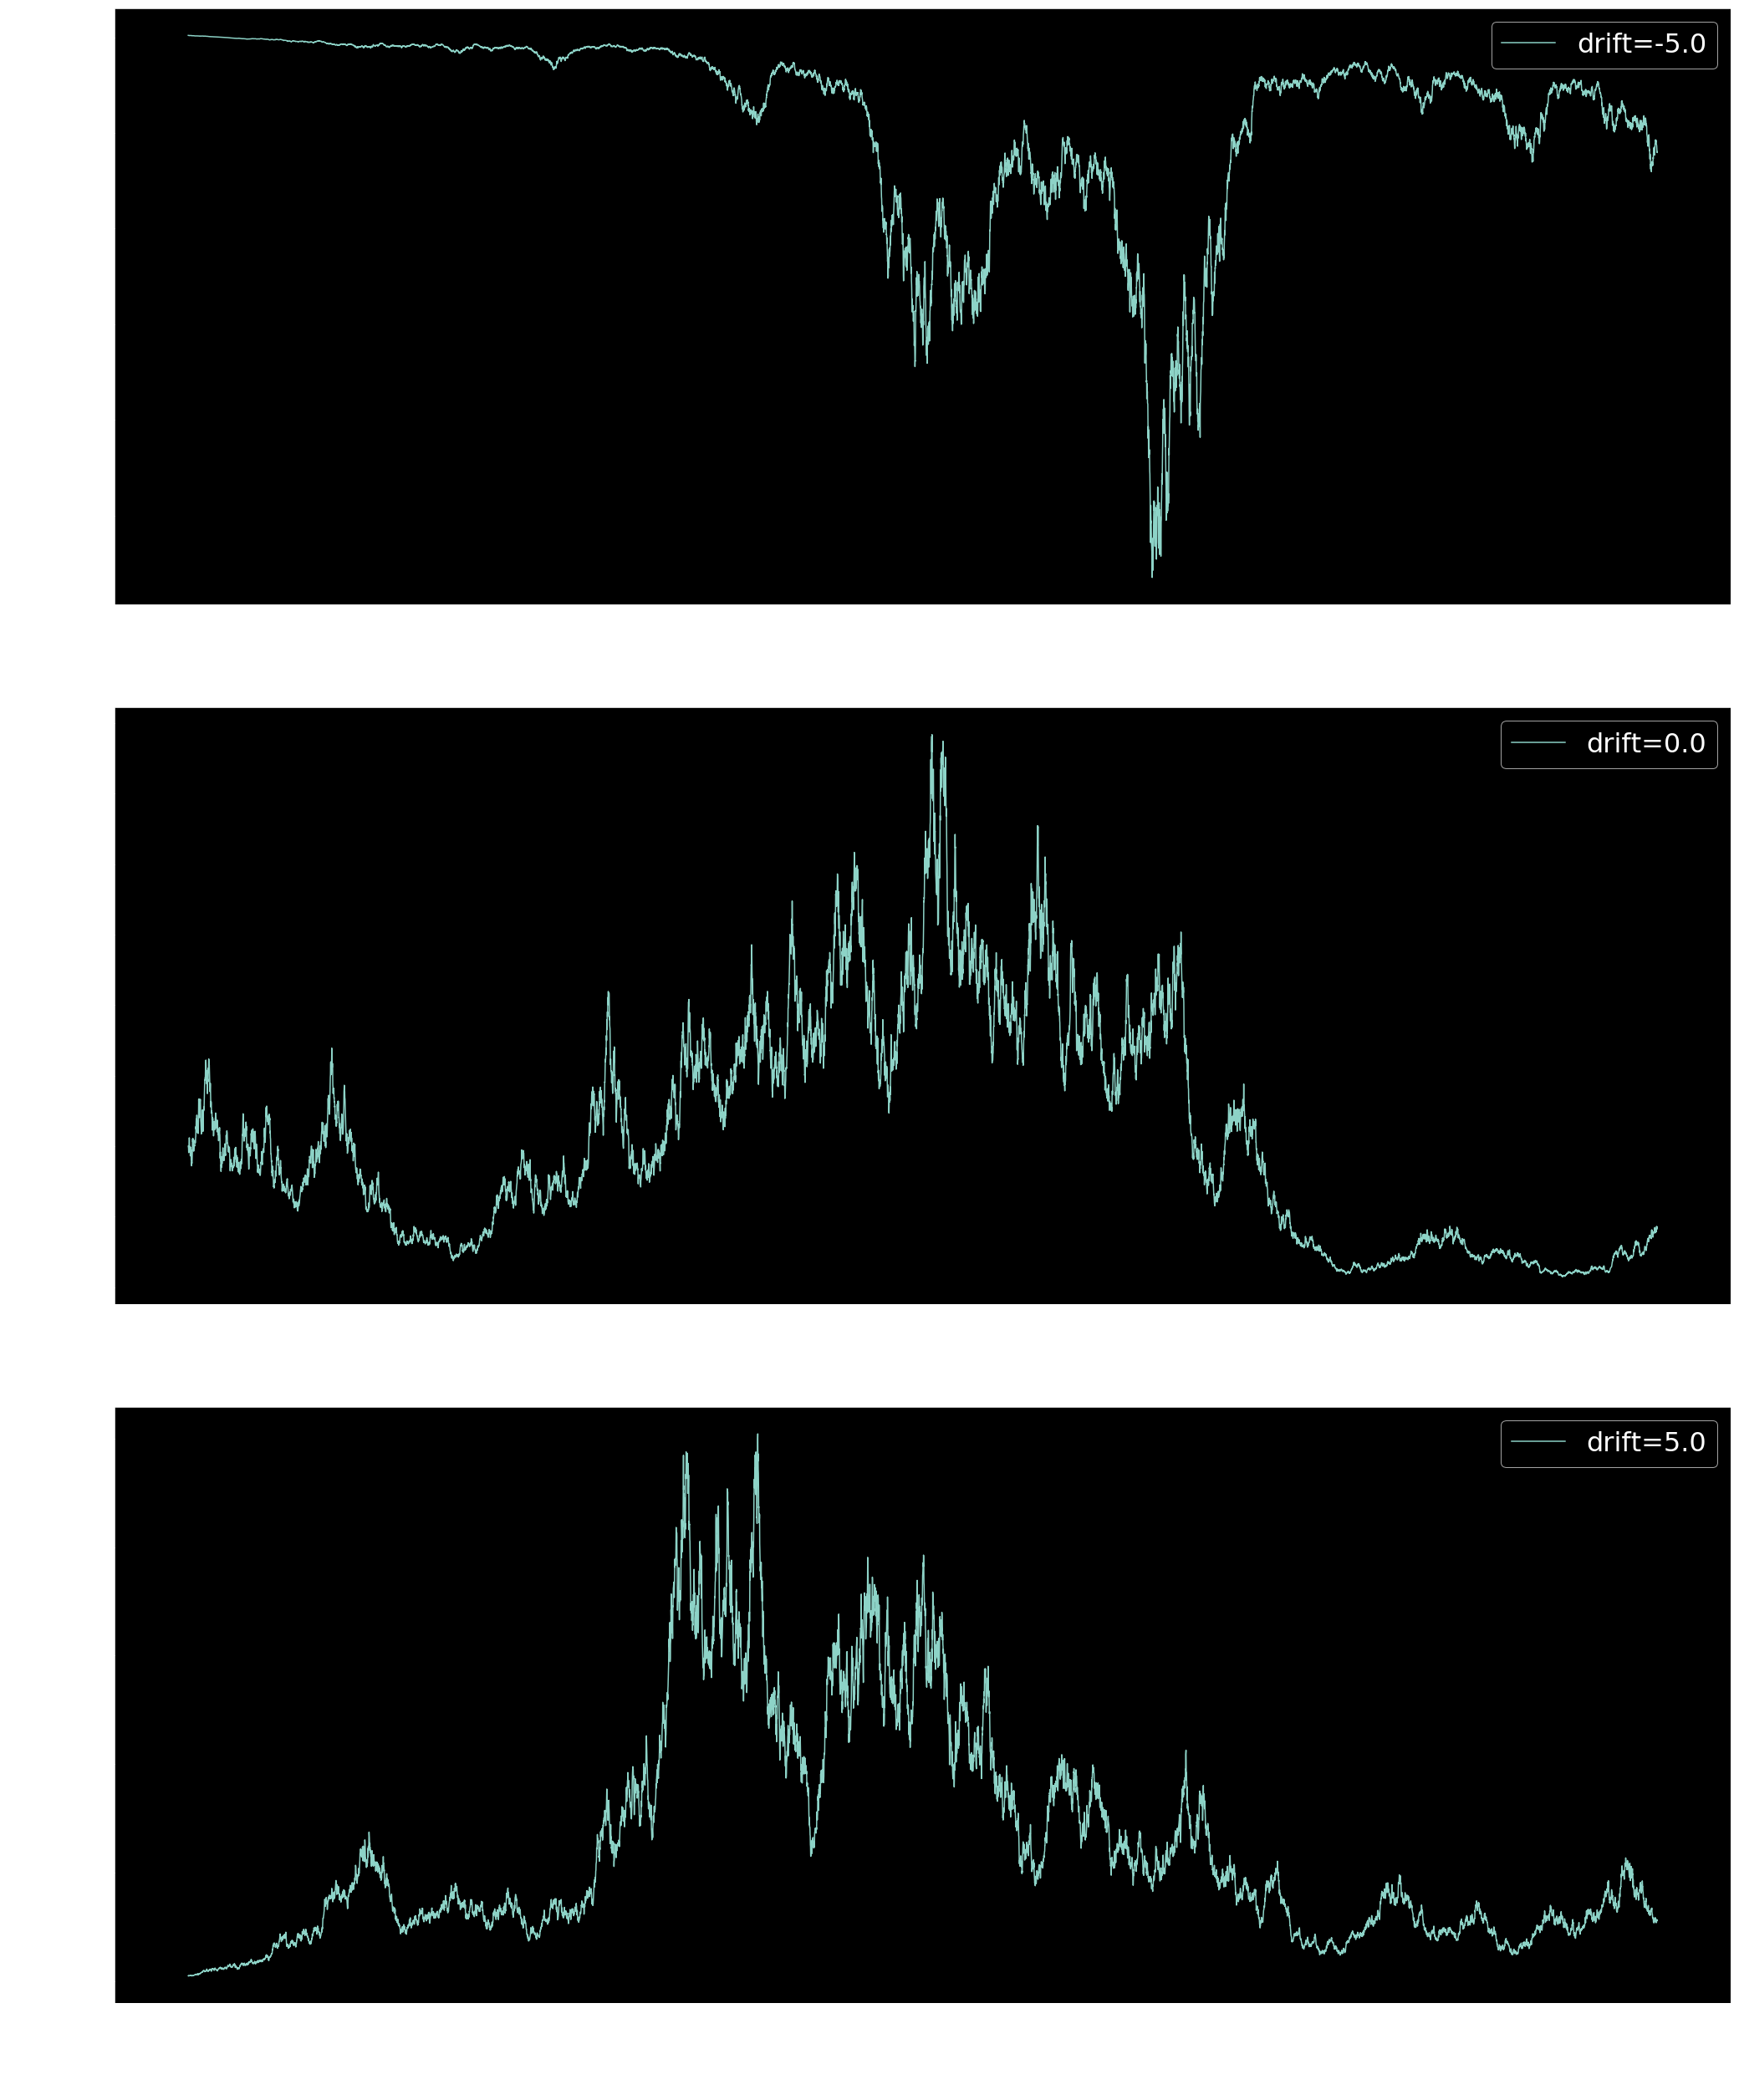

In [11]:
fig, axes = plt.subplots(figsize=(29, 35), nrows=3, ncols=1)

drifts = [-5.0, 0.0, 5.0]

X = Ito.pseudo_GBM(x0=1, T=10, scheme_steps=SCHEME_STEPS, drift=0, vol=1)
    
for i, ax in enumerate(axes):
    drift = drifts[i]
    X.drift_double = drift
    df = X.simulate()
    df.columns = ['drift={}'.format(drift)]
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\n', fontsize=FONT_SIZE)
    ax.set_ylabel('spot', fontsize=FONT_SIZE)
    ax.legend(prop={'size': LEGEND_SIZE})
    ax.tick_params(labelsize=FONT_SIZE)
   
plt.tight_layout()
plt.show()

## Vasicek model

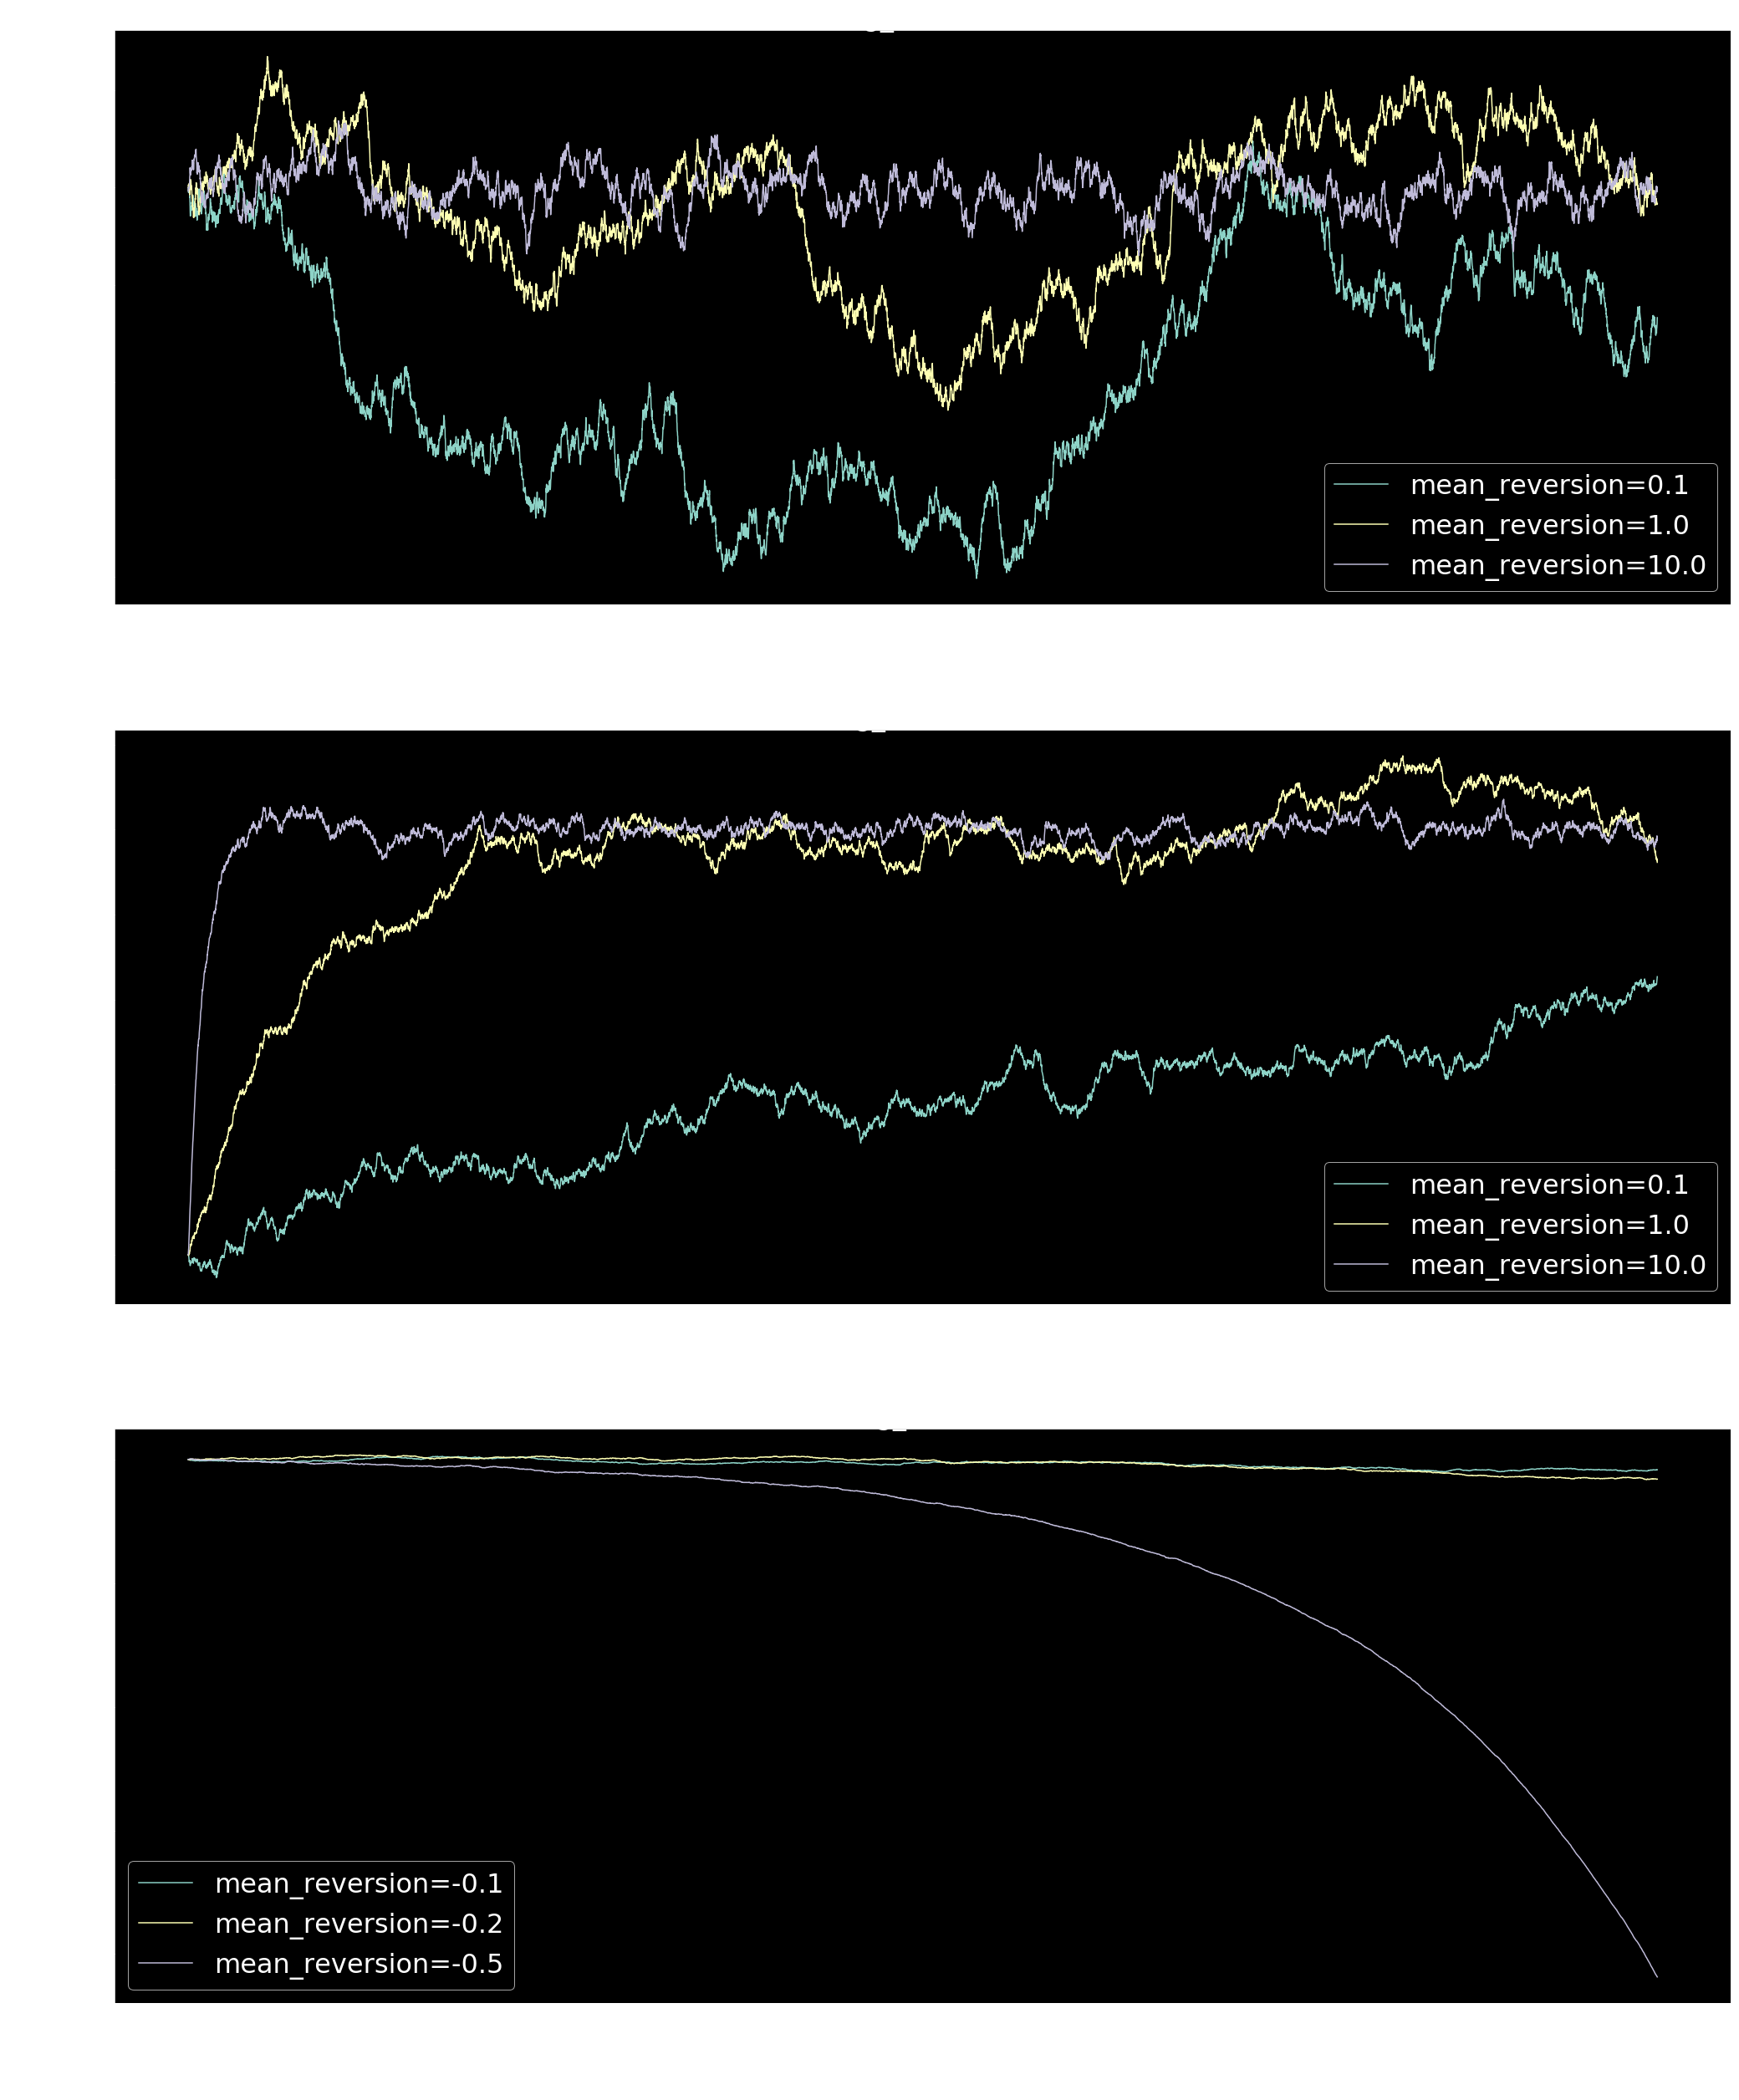

In [12]:
fig, axes = plt.subplots(figsize=(29, 35), nrows=3, ncols=1)

mean_reversion_sets = [
    [0.1, 1.0, 10.0],
    [0.1, 1.0, 10.0],
    [-0.1, -0.2, -0.5]
]

long_terms = [0.0, 10.0, 0]

X = Ito.Vasicek(x0=0, T=10, scheme_steps=SCHEME_STEPS, vol=1)
    
for i, ax in enumerate(axes):
    long_term = long_terms[i]
    mean_reversions = mean_reversion_sets[i]
    for mean_reversion in mean_reversions:
        X.mean_reversion = mean_reversion
        X.long_term = long_term
        df = X.simulate()
        df.columns = ['mean_reversion={}'.format(mean_reversion)]
        df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\n', fontsize=FONT_SIZE)
    ax.set_ylabel('spot', fontsize=FONT_SIZE)
    ax.legend(prop={'size': LEGEND_SIZE})
    ax.tick_params(labelsize=FONT_SIZE)
    ax.set_title('long_term={}'.format(long_term),\
                 fontsize=FONT_SIZE)
plt.tight_layout()
plt.show()

## CIR model

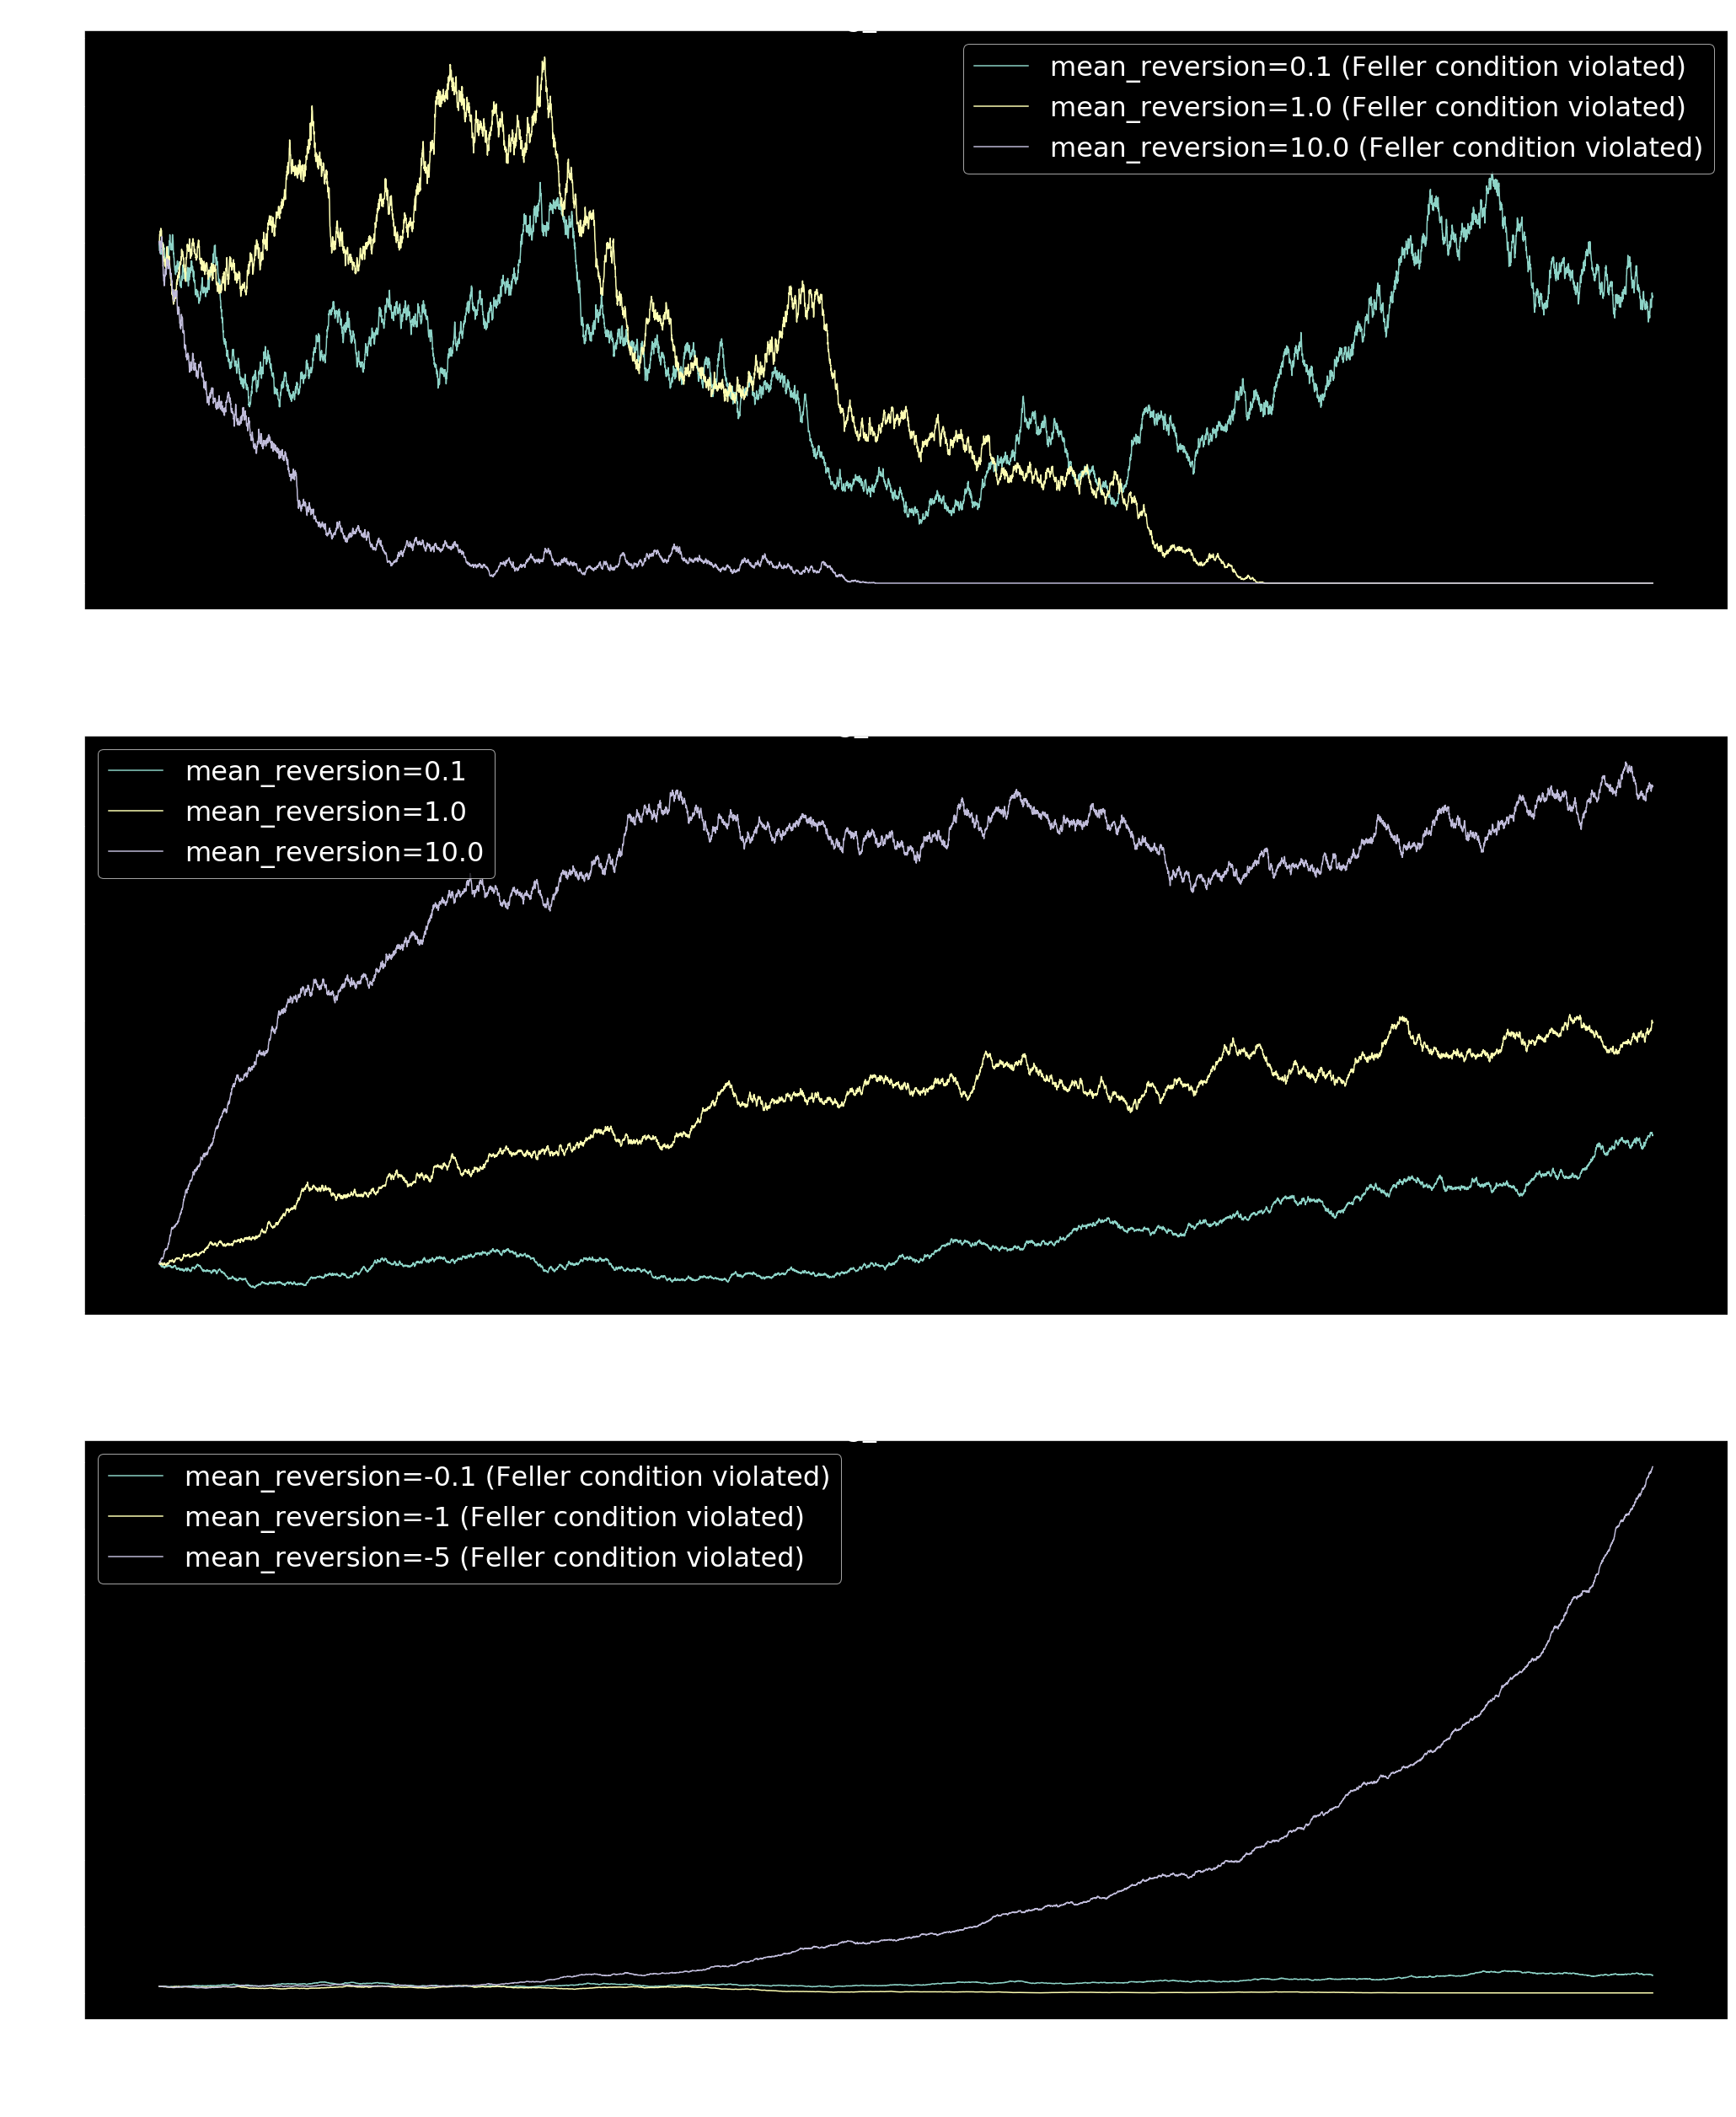

In [13]:
fig, axes = plt.subplots(figsize=(29, 35), nrows=3, ncols=1)

mean_reversion_sets = [
    [0.1, 1.0, 10.0],
    [0.1, 1.0, 10.0],
    [-0.1, -1, -5]
]

long_terms = [0.0, 10.0, 0.0]

# need to supply a boundary condition at zero in the case where
# the Feller condition is not met since it can then produce negative spot
# and thus imaginary square root volatility with nonzero probability
# inside the discretization scheme
X = Ito.CIR(x0=1, T=1, scheme_steps=SCHEME_STEPS, vol=1,\
            barrier=0, barrier_condition='absorb')
    
for i, ax in enumerate(axes):
    long_term = long_terms[i]
    mean_reversions = mean_reversion_sets[i]
    for mean_reversion in mean_reversions:
        X.mean_reversion = mean_reversion
        X.long_term = long_term
        df = X.simulate()
        label = 'mean_reversion={}'.format(mean_reversion)
        if not X.feller_condition:
            label += ' (Feller condition violated)'
        df.columns = [label]
        df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\n', fontsize=FONT_SIZE)
    ax.set_ylabel('spot', fontsize=FONT_SIZE)
    ax.legend(prop={'size': LEGEND_SIZE})
    ax.tick_params(labelsize=FONT_SIZE)
    ax.set_title('long_term={}'.format(long_term),\
                 fontsize=FONT_SIZE)
plt.tight_layout()
plt.show()